📊 Estatísticas Descritivas:


project_id      group_id mention_handle  interval  total_commits  \
count   1.860000e+02  1.860000e+02            186     186.0     186.000000   
unique           NaN           NaN            181       NaN            NaN   
top              NaN           NaN  mpintodacunha       NaN            NaN   
freq             NaN           NaN              2       NaN            NaN   
mean    5.536923e+07  8.235672e+07            NaN       1.0       1.725806   
std     5.567724e+06  9.589986e+06            NaN       0.0       4.014175   
min     5.052158e+07  7.404790e+07            NaN       1.0       0.000000   
25%     5.055425e+07  7.404790e+07            NaN       1.0       0.000000   
50%     5.055433e+07  7.404790e+07            NaN       1.0       0.000000   
75%     6.176088e+07  9.336591e+07            NaN       1.0       0.000000   
max     6.176097e+07  9.336591e+07            NaN       1.0      26.000000   

        sum_lines_added  sum_lines_deleted  sum_lines_per_commit  active_days  \
count        186.000000         186.000000            186.000000   186.000000   
unique              NaN                NaN                   NaN          NaN   
top                 NaN                NaN                   NaN          NaN   
freq                NaN                NaN                   NaN          NaN   
mean          23.166667           1.177419             24.344086     0.489247   
std           76.239801           5.559091             79.376284     1.056456   
min            0.000000           0.000000              0.000000     0.000000   
25%            0.000000           0.000000              0.000000     0.000000   
50%            0.000000           0.000000              0.000000     0.000000   
75%            0.000000           0.000000              0.000000     0.000000   
max          686.000000          59.000000            689.000000     6.000000   

        last_minute_commits  ...  merged_requests  review_comments_given  \
count                 186.0  ...       186.000000             186.000000   
unique                  NaN  ...              NaN                    NaN   
top                     NaN  ...              NaN                    NaN   
freq                    NaN  ...              NaN                    NaN   
mean                    0.0  ...         0.521505               3.543011   
std                     0.0  ...         0.691313              10.477816   
min                     0.0  ...         0.000000               0.000000   
25%                     0.0  ...         0.000000               0.000000   
50%                     0.0  ...         0.000000               0.500000   
75%                     0.0  ...         1.000000               3.000000   
max                     0.0  ...         4.000000             112.000000   

        review_comments_received  total_issues_created  total_issues_assigned  \
count                 186.000000            186.000000             186.000000   
unique                       NaN                   NaN                    NaN   
top                          NaN                   NaN                    NaN   
freq                         NaN                   NaN                    NaN   
mean                    3.596774              1.478495               1.295699   
std                     6.200592              1.840115               1.004682   
min                     0.000000              0.000000               0.000000   
25%                     0.000000              0.000000               1.000000   
50%                     0.000000              1.000000               1.000000   
75%                     5.000000              2.000000               2.000000   
max                    40.000000             11.000000               6.000000   

        issues_resolved  issue_participation  branches_created  \
count        186.000000           186.000000        186.000000   
unique              NaN                  NaN               NaN   
top             

❓ Valores em falta por coluna:
project_id                  0
group_id                    0
mention_handle              0
interval                    0
total_commits               0
sum_lines_added             0
sum_lines_deleted           0
sum_lines_per_commit        0
active_days                 0
last_minute_commits         0
total_merge_requests        0
merged_requests             0
review_comments_given       0
review_comments_received    0
total_issues_created        0
total_issues_assigned       0
issues_resolved             0
issue_participation         0
branches_created            0
merges_to_main_branch       0
Final Grade                 0
dtype: int64
🚨 Outliers (Z-score > 3):
project_id                  0
group_id                    0
interval                    0
total_commits               6
sum_lines_added             4
sum_lines_deleted           2
sum_lines_per_commit        5
active_days                 6
last_minute_commits         0
total_merge_requests        2


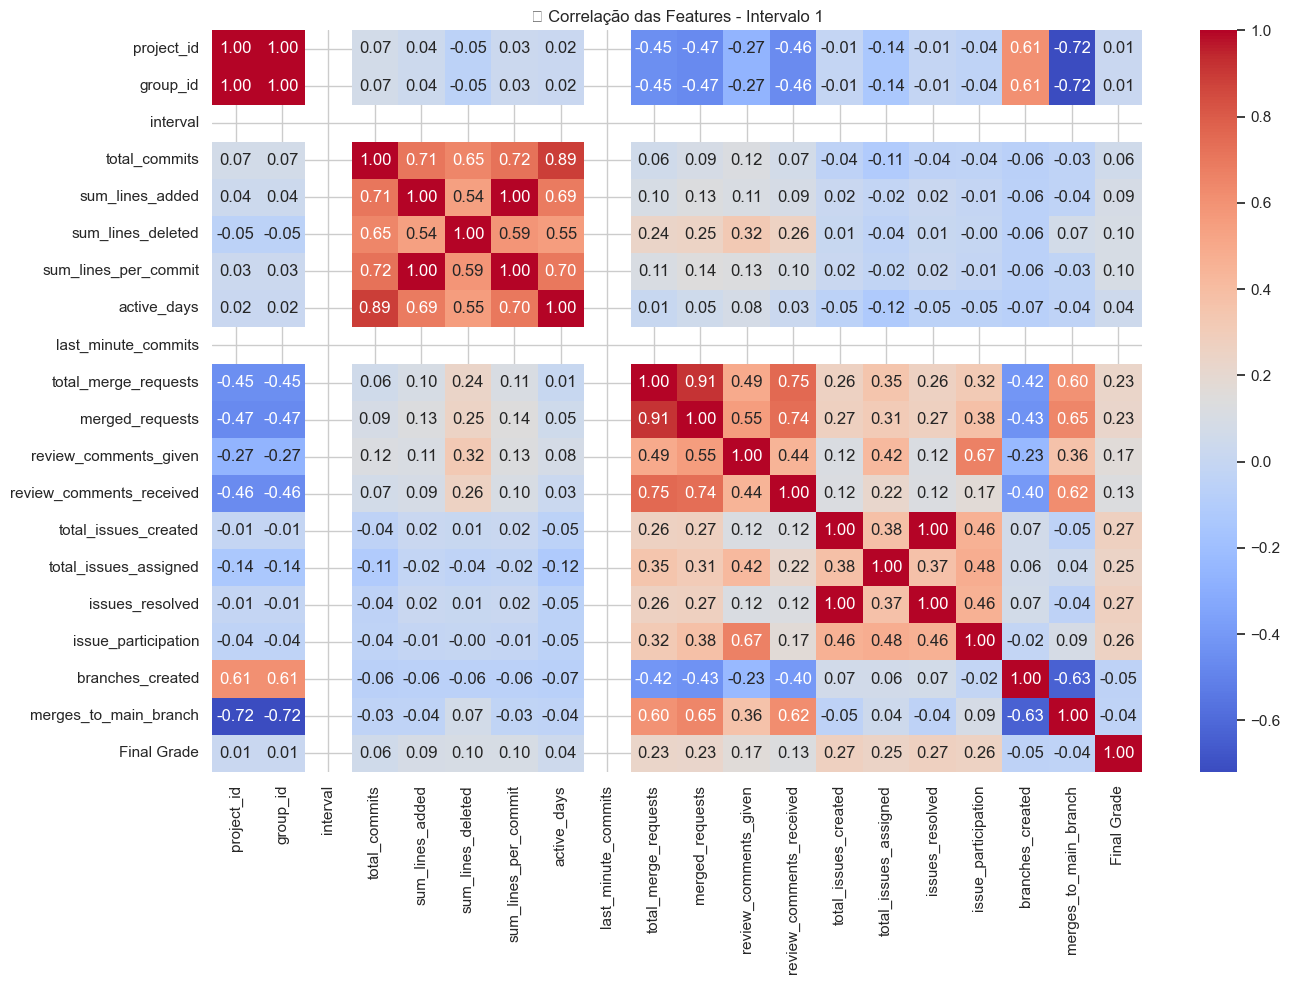

In [ ]:
### EDA Reforçada para Análise de Dados de Estudantes
#Estatísticas, Outliers, Correlação

# EDA Reforçada
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Para um ficheiro específico (troca o número conforme o intervalo)
interval = 1
file_path = f"student_features_interval_{interval}.csv"
df = pd.read_csv(file_path)

# 1. Estatísticas Básicas
print("📊 Estatísticas Descritivas:")
display(df.describe(include='all'))

# 2. Valores em falta
print("❓ Valores em falta por coluna:")
print(df.isnull().sum())

# 3. Outliers com Z-Score
z_scores = df.select_dtypes(include='number').apply(zscore)
outliers = (np.abs(z_scores) > 3).sum()
print("🚨 Outliers (Z-score > 3):")
print(outliers)

# 4. Correlação com a nota final
if "Final Grade" in df.columns:
    correlations = df.corr(numeric_only=True)["Final Grade"].sort_values(ascending=False)
    print("🔍 Correlação com Final Grade:")
    print(correlations)

    # Mapa de calor
    plt.figure(figsize=(14, 10))
    sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
    plt.title(f"🔗 Correlação das Features - Intervalo {interval}")
    plt.tight_layout()
    plt.show()


In [ ]:
###Feature Selection + Random Forest Pipeline


# Pipeline com SelectKBest e RandomForest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 🔹 1. Preparar X e y
df = df.dropna(subset=["Final Grade"])
X = df.drop(columns=["Final Grade", "project_id", "group_id", "mention_handle", "interval"], errors="ignore")
y = df["Final Grade"]

# 🔹 2. Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 3. Seleção de Features (Top 8)
selector = SelectKBest(score_func=f_regression, k=8)
X_selected = selector.fit_transform(X_scaled, y)
selected_columns = X.columns[selector.get_support()]
print("✅ Features Selecionadas:", selected_columns.tolist())

# 🔹 4. Dividir treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# 🔹 5. Treinar Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# 🔹 6. Resultados
print("\n📈 Avaliação do Modelo Random Forest:")
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


✅ Features Selecionadas: ['total_merge_requests', 'merged_requests', 'review_comments_given', 'review_comments_received', 'total_issues_created', 'total_issues_assigned', 'issues_resolved', 'issue_participation']

📈 Avaliação do Modelo Random Forest:
R²: -0.13520631604241773
MAE: 2.458383504653241
MSE: 12.922012615505


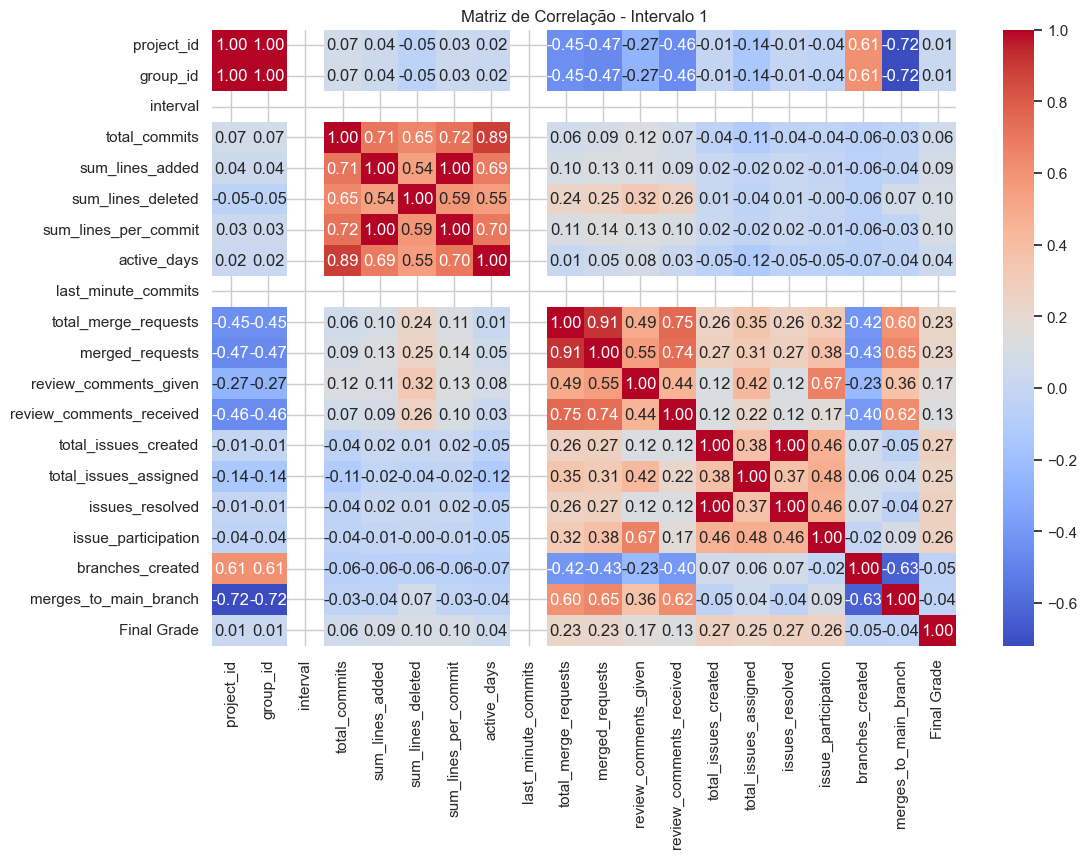

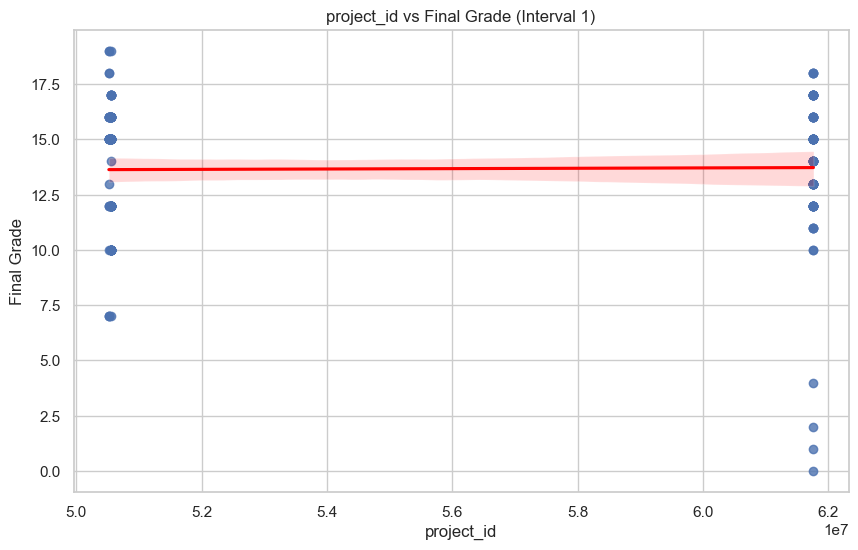

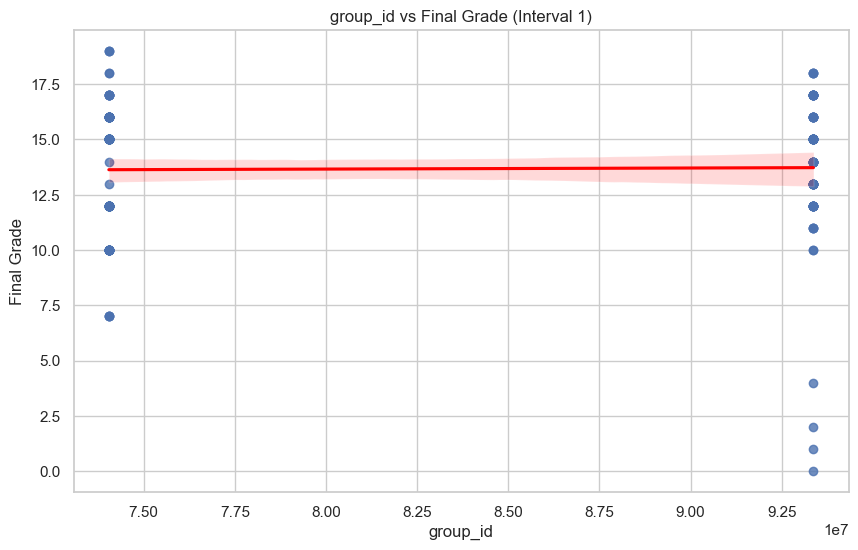

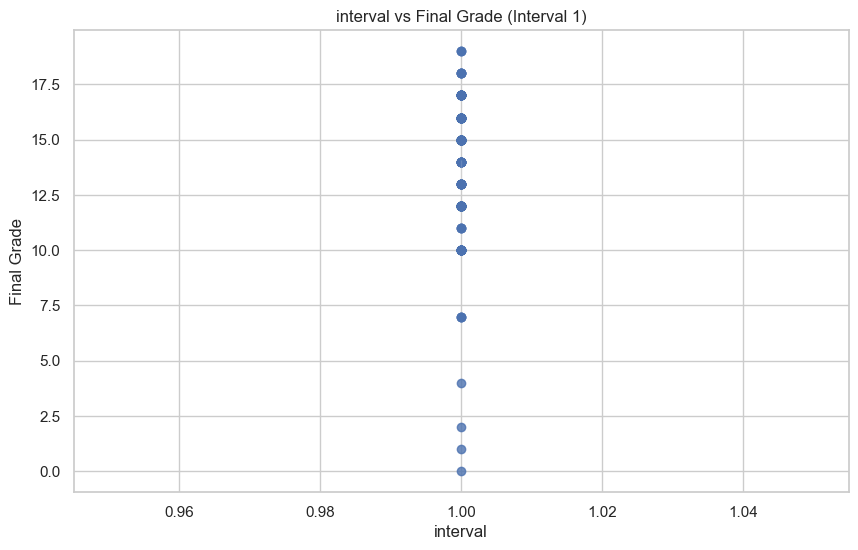

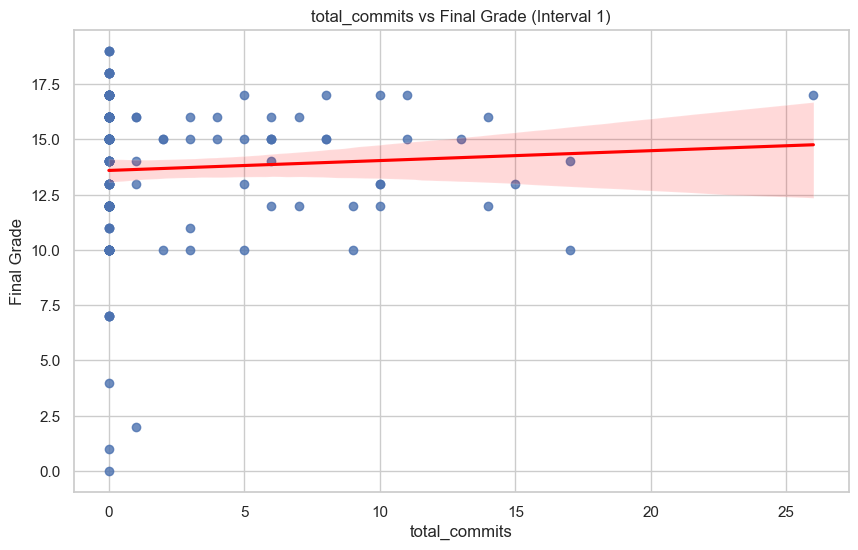

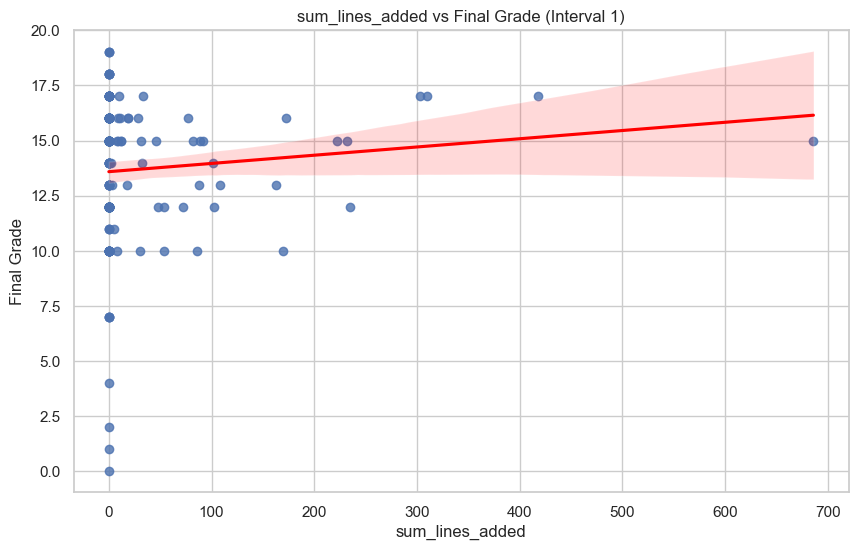

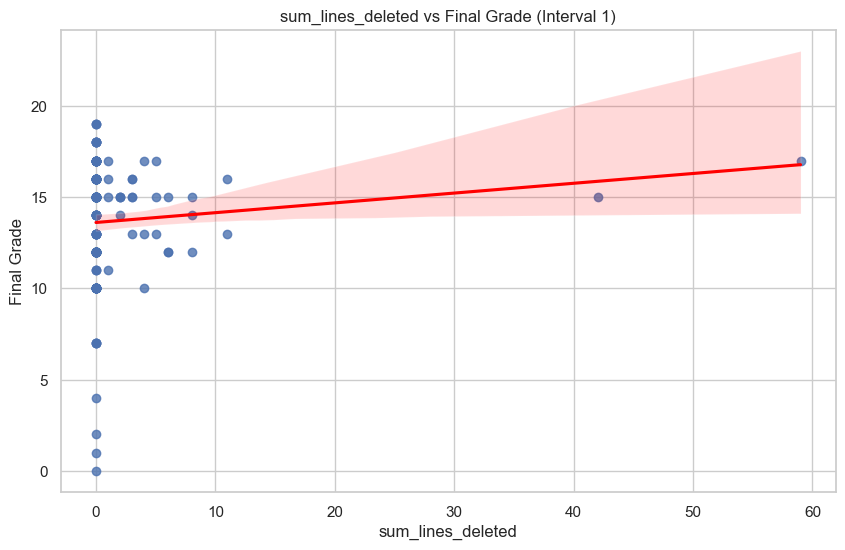

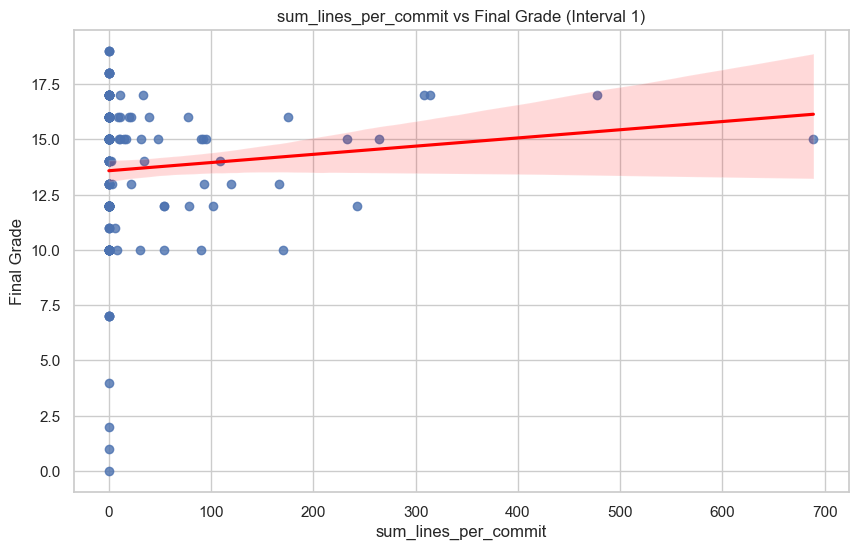

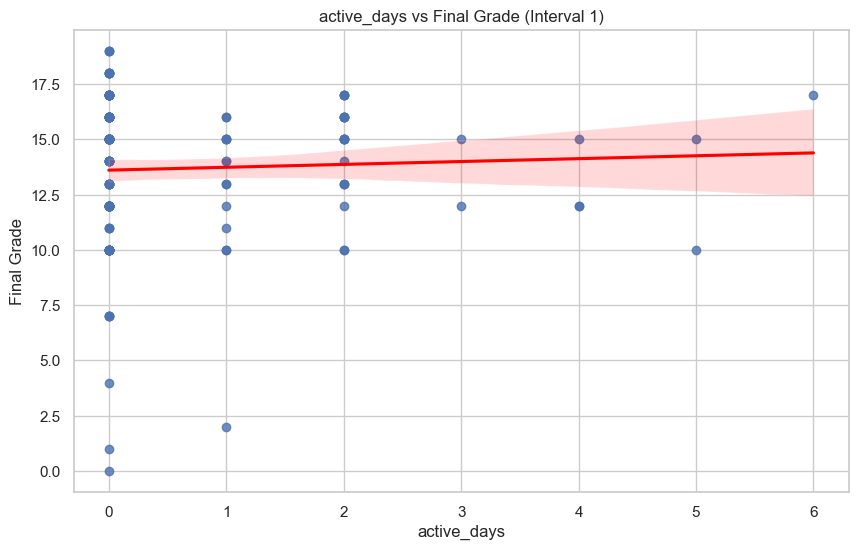

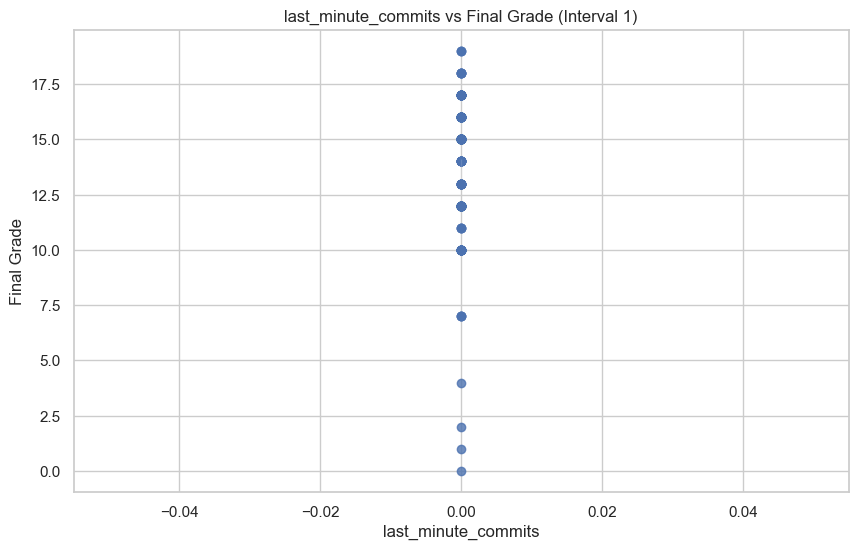

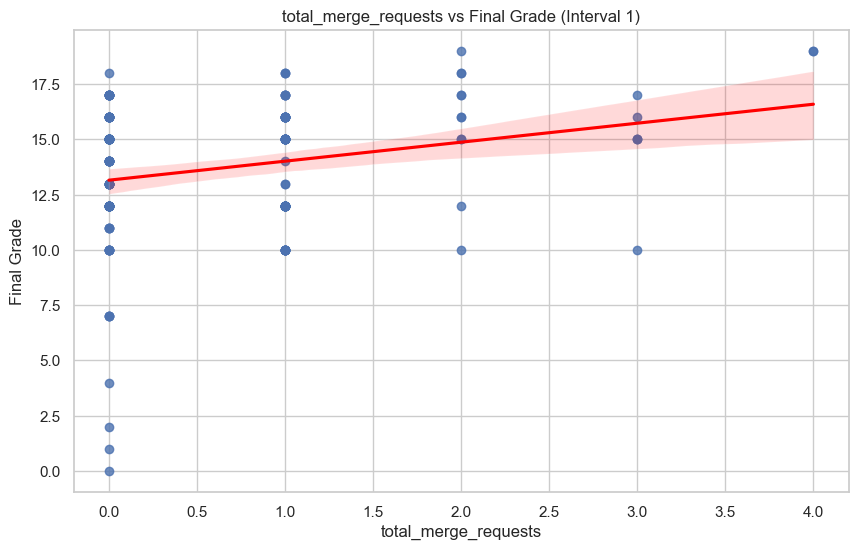

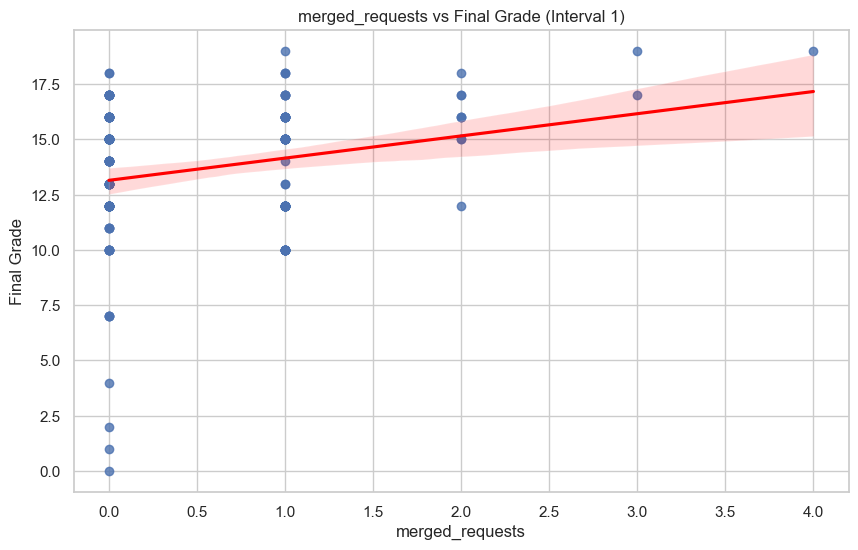

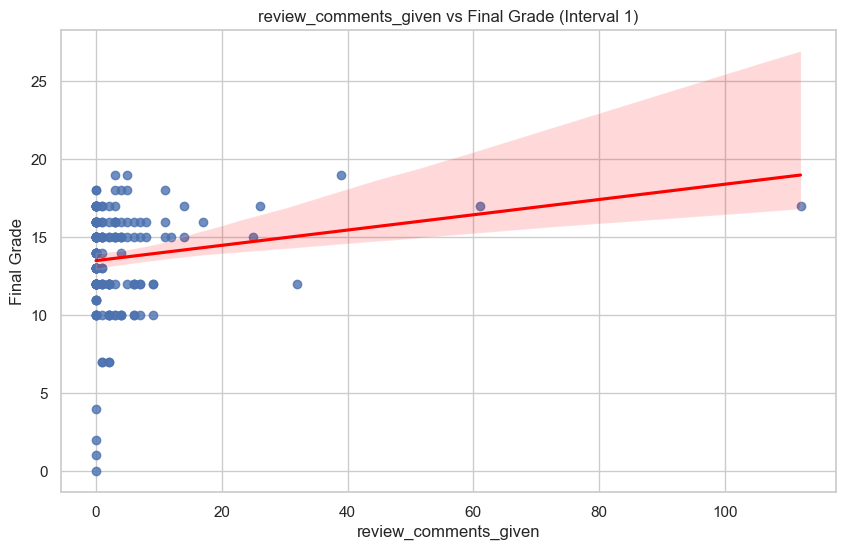

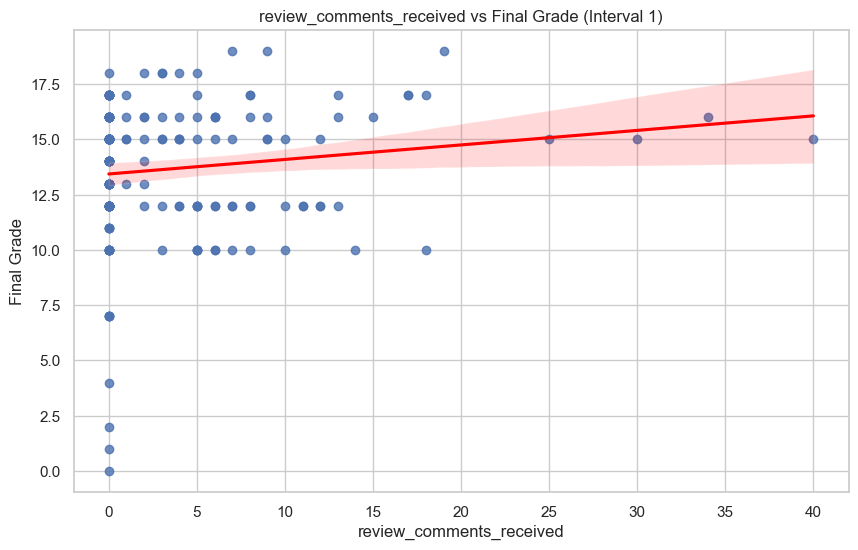

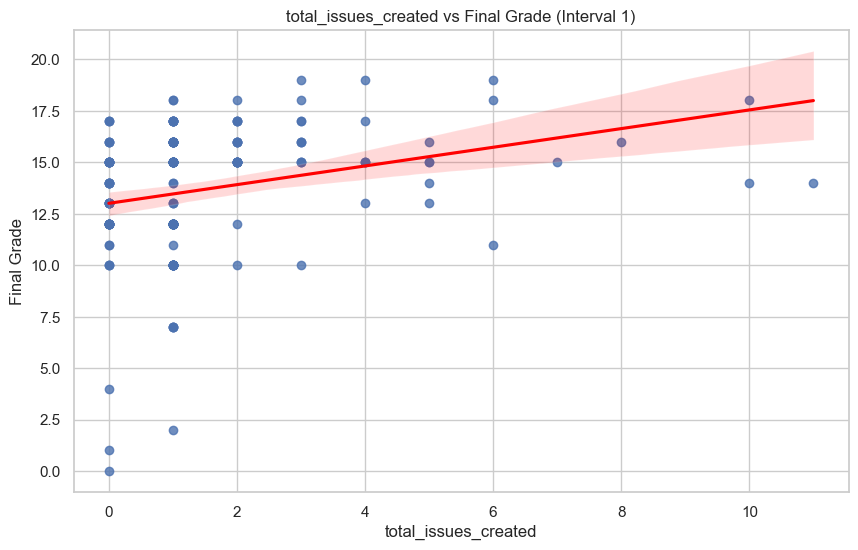

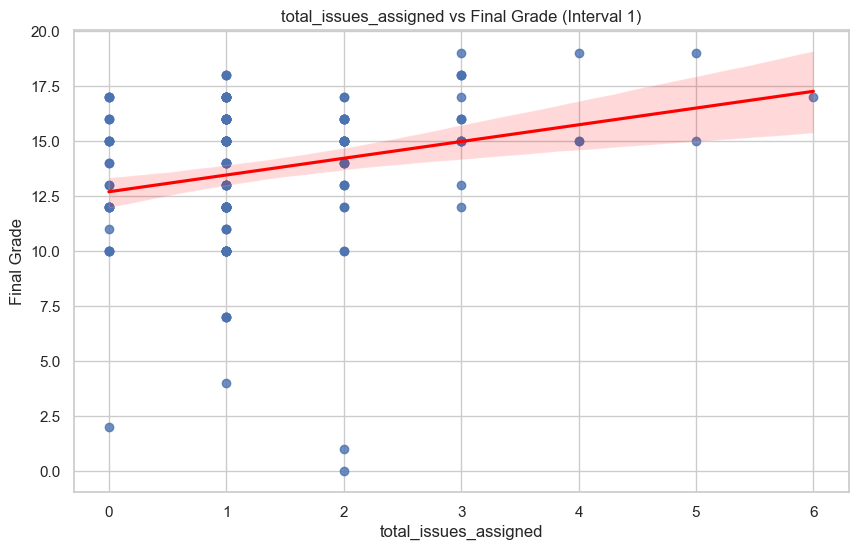

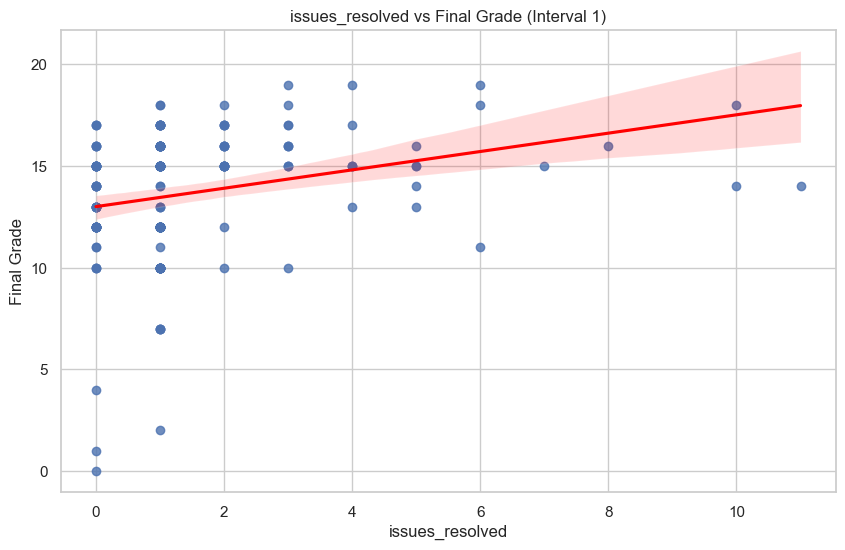

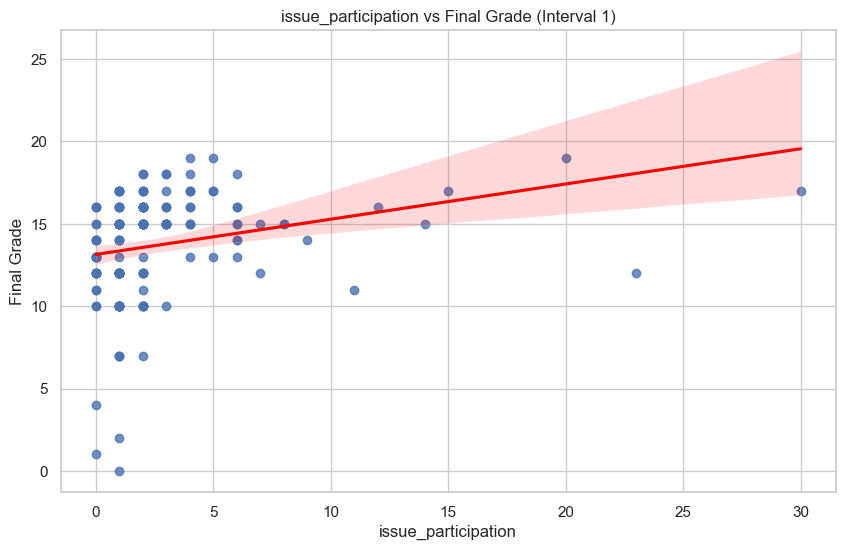

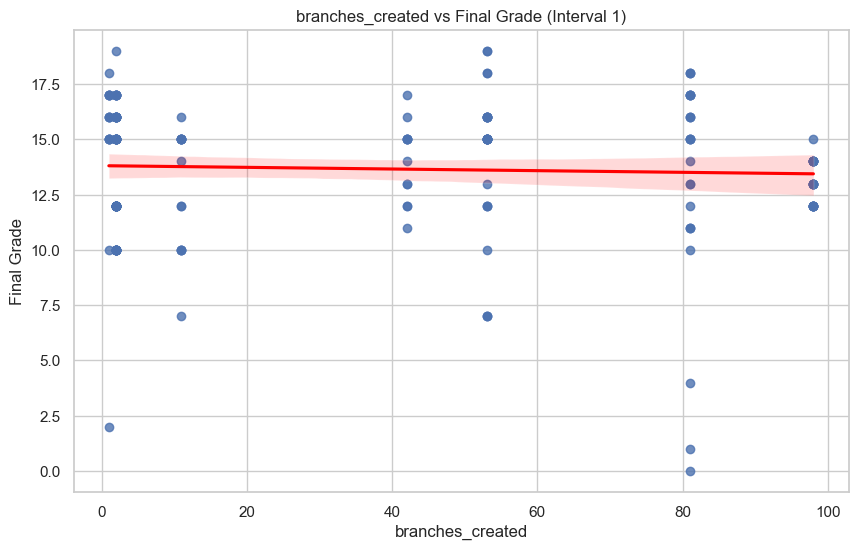

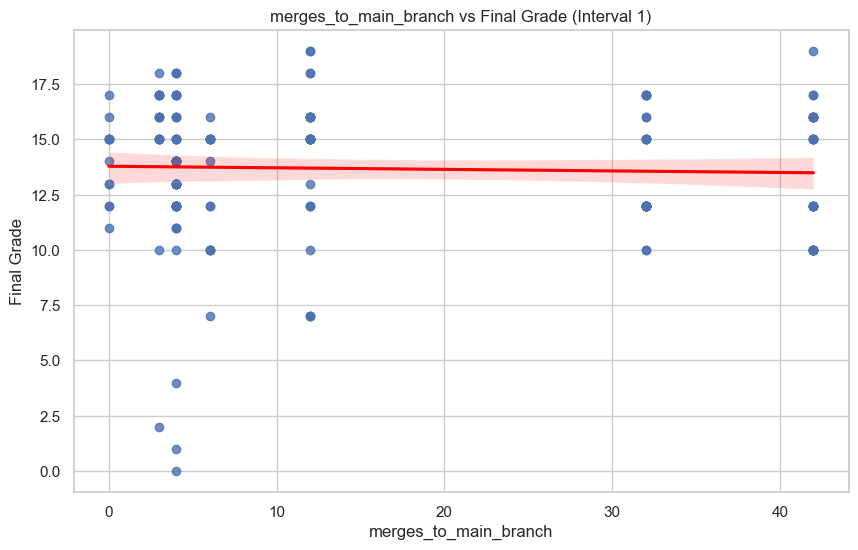

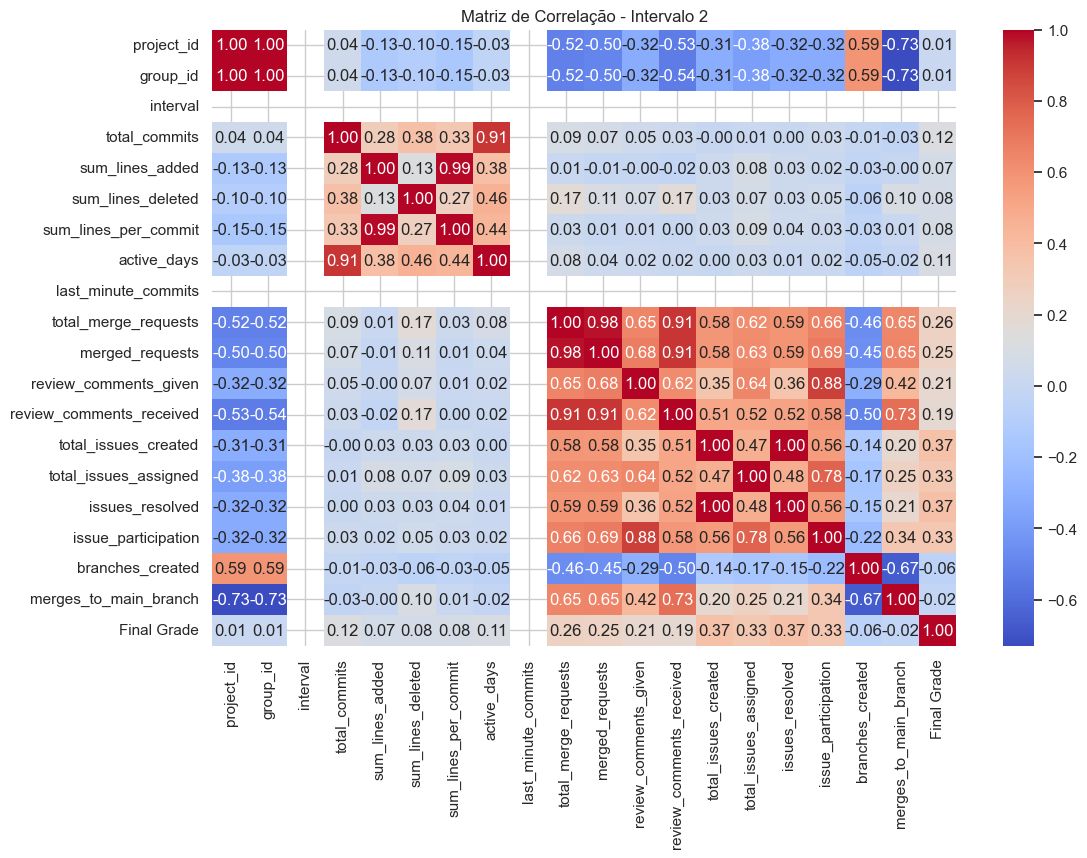

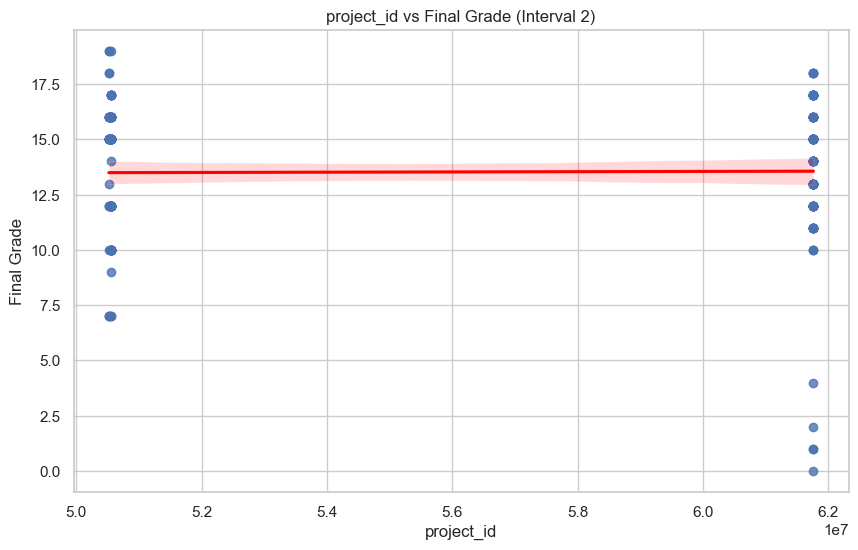

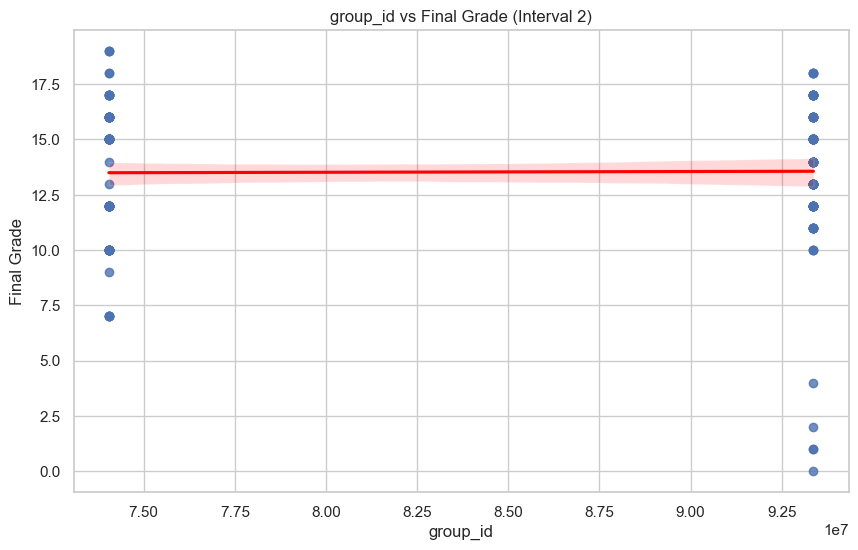

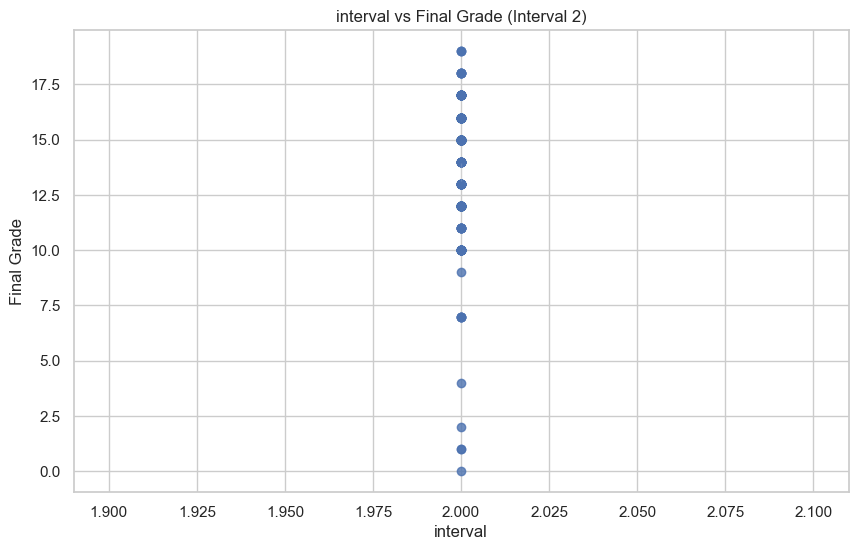

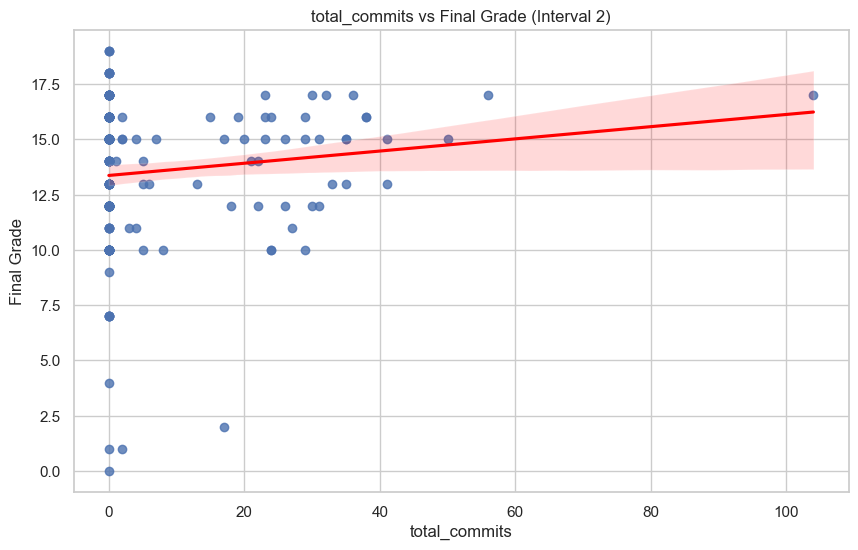

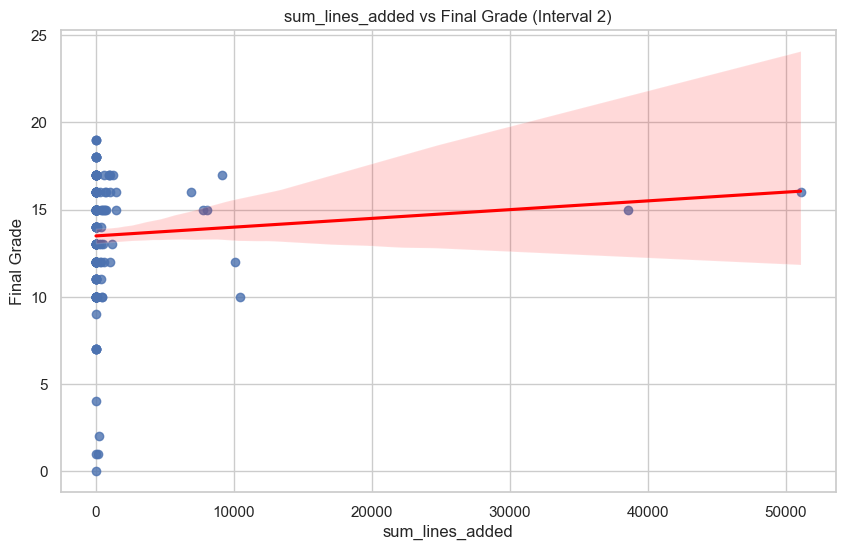

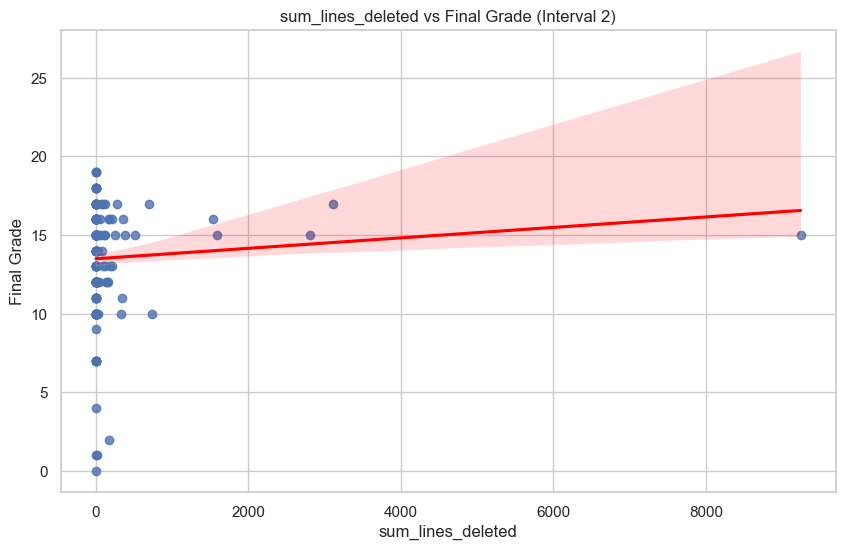

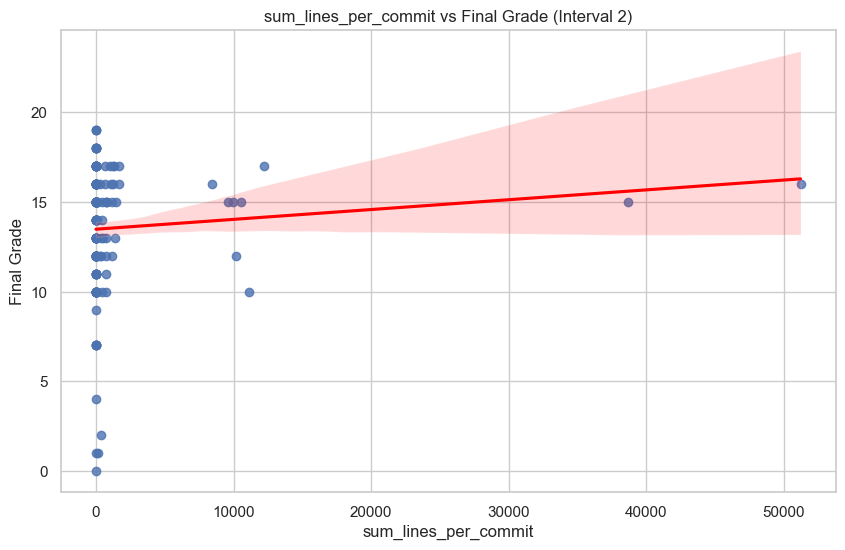

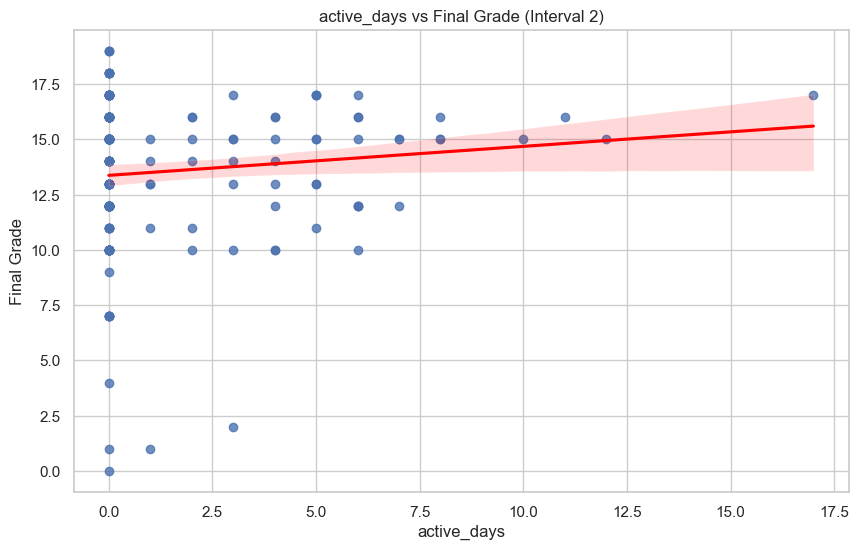

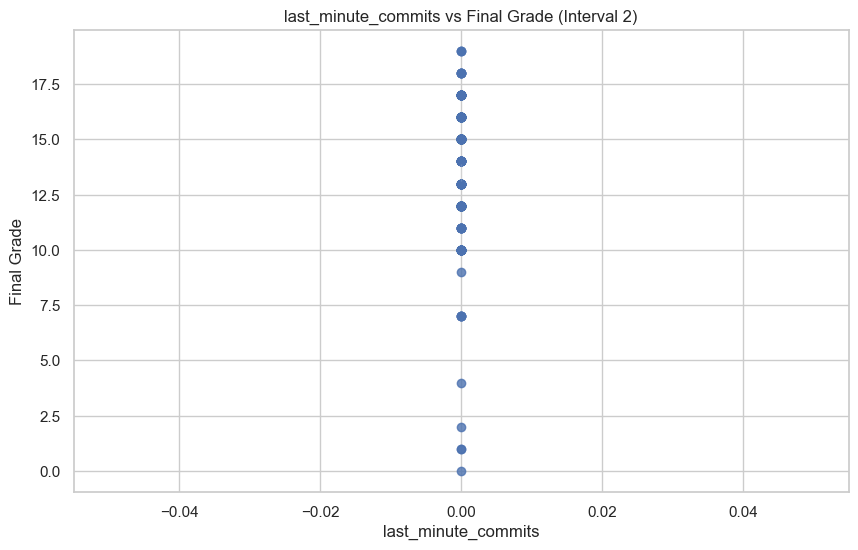

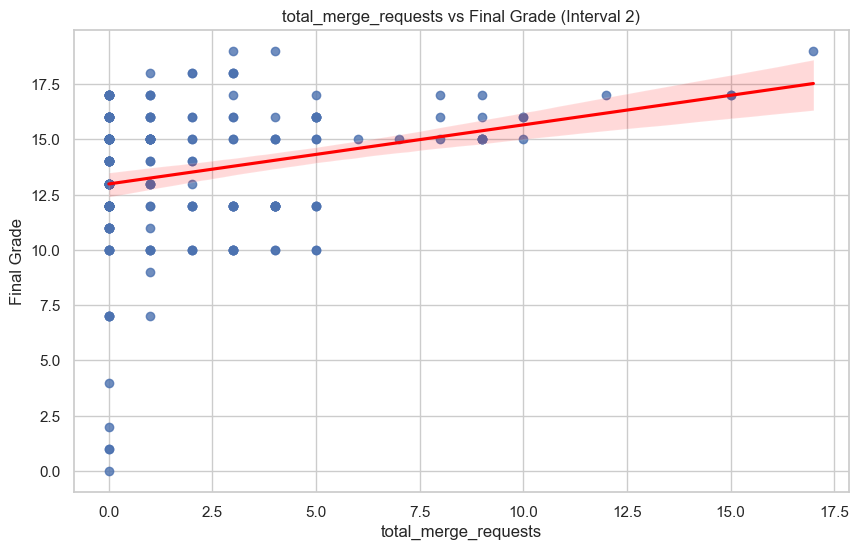

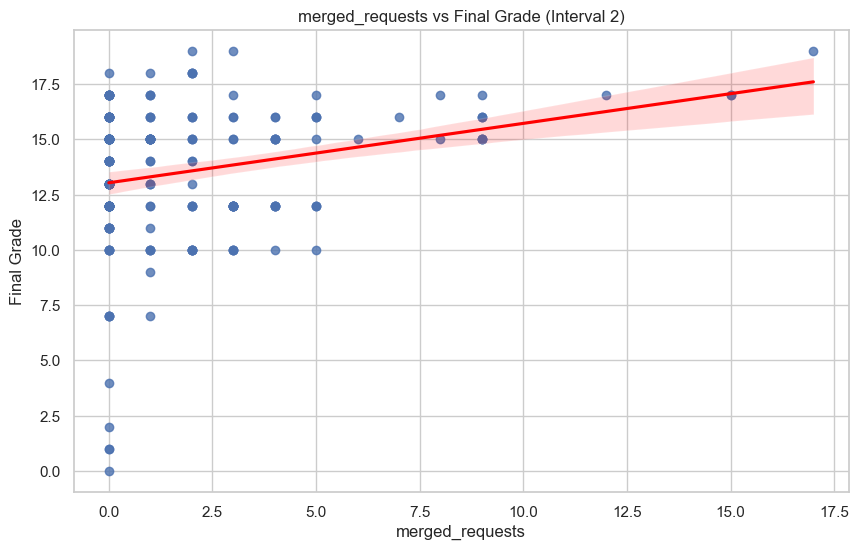

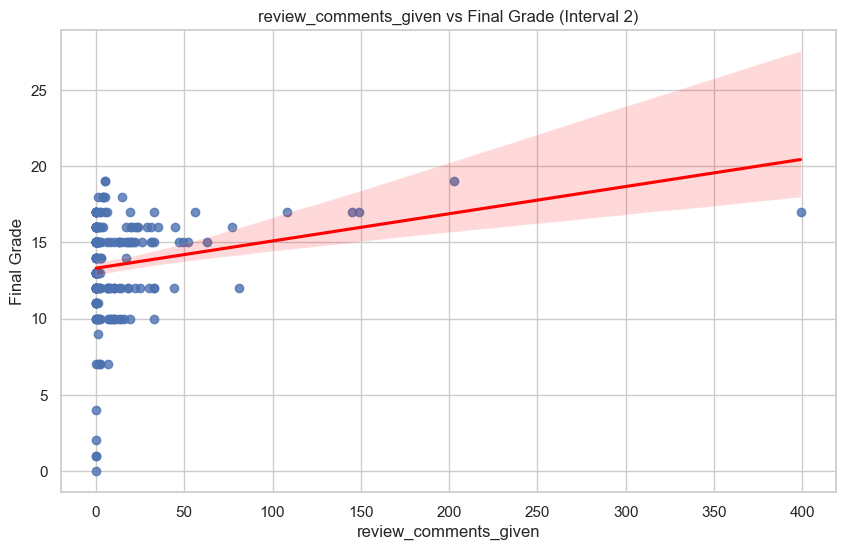

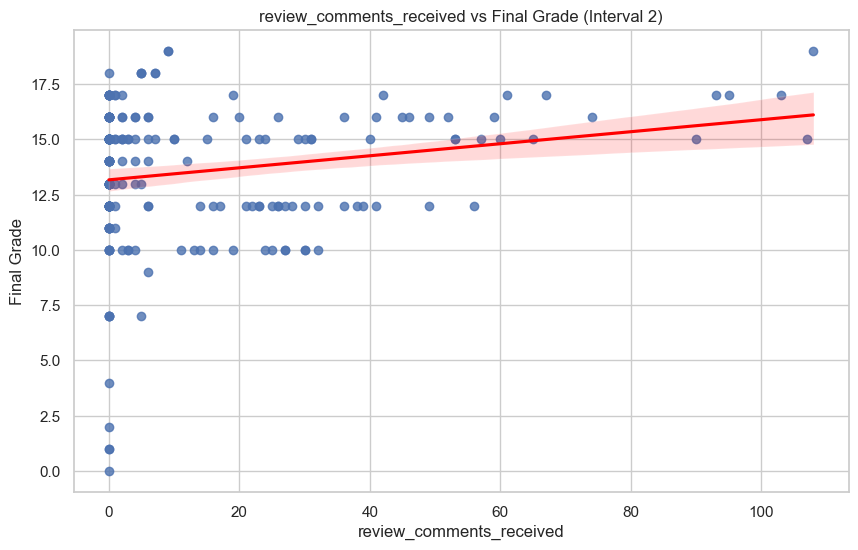

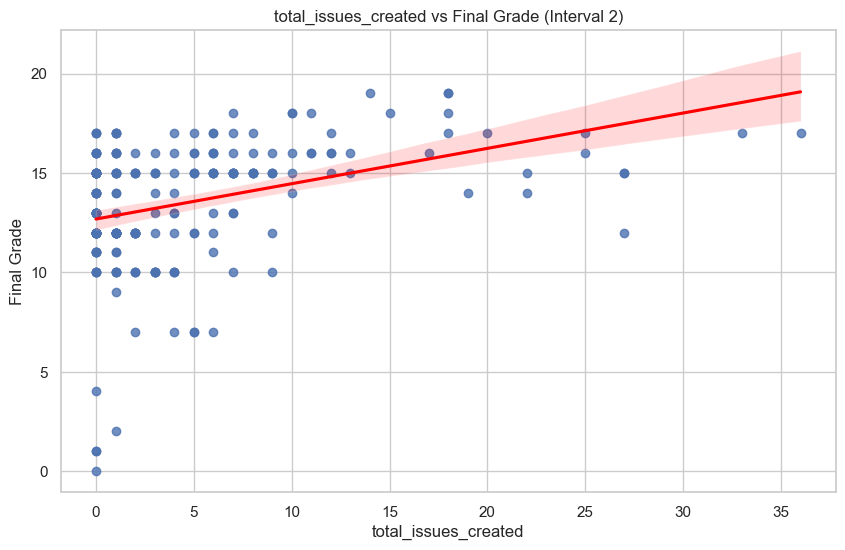

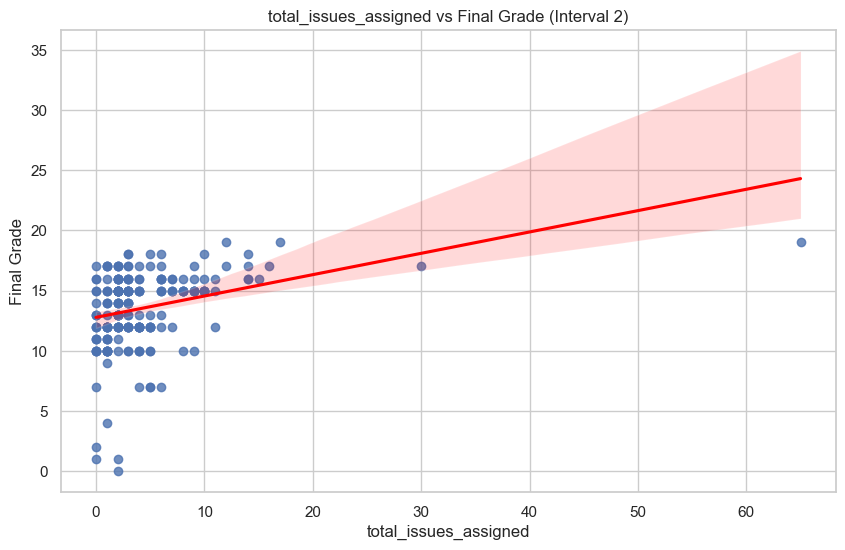

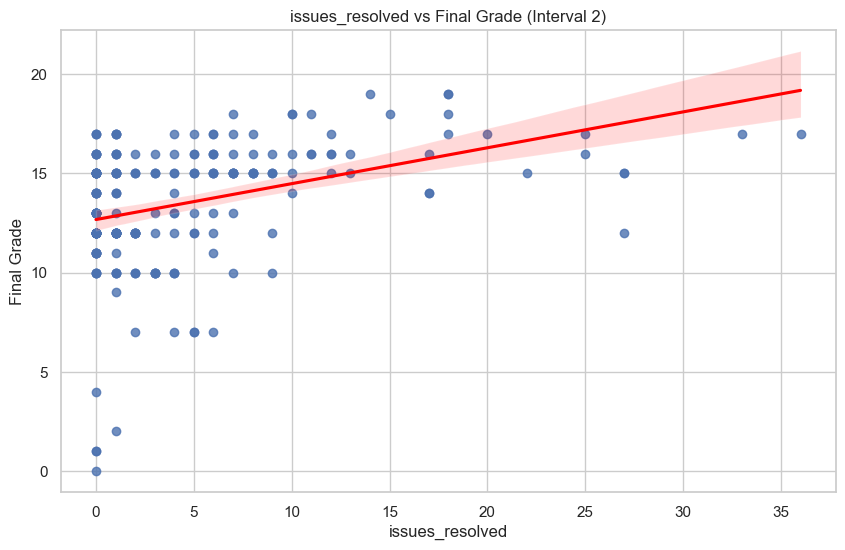

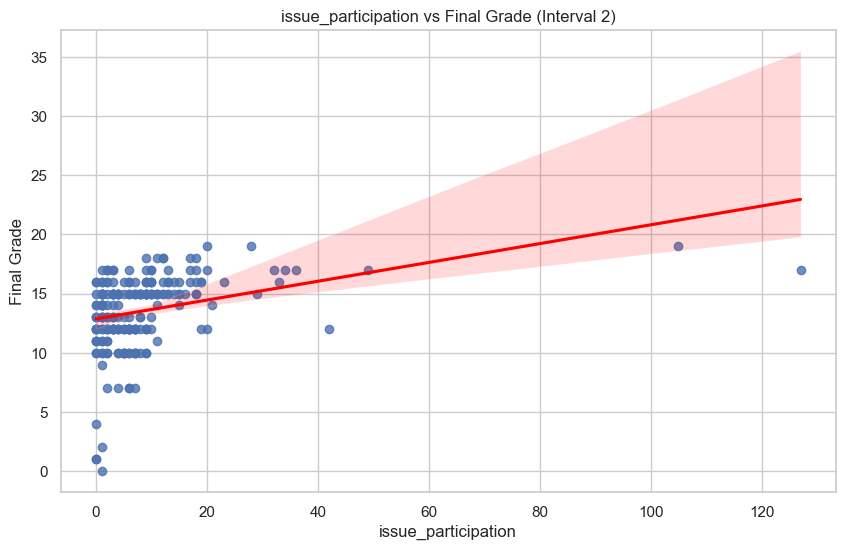

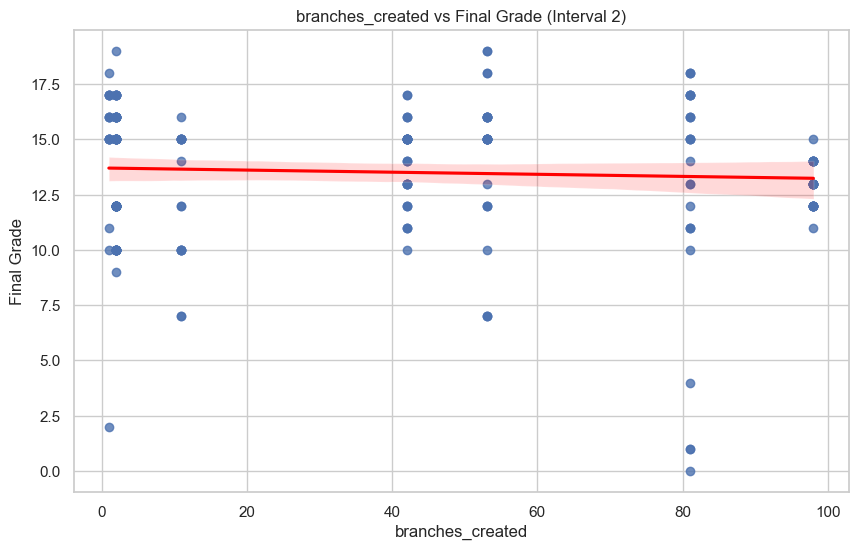

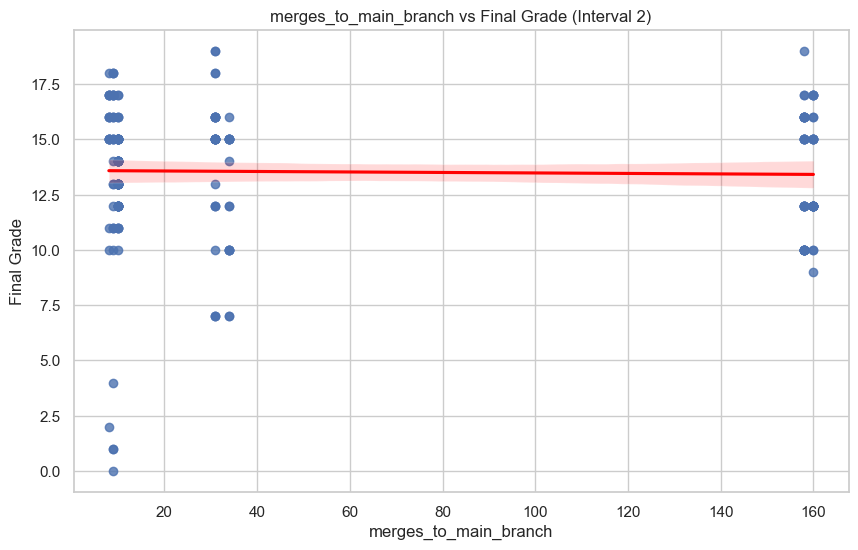

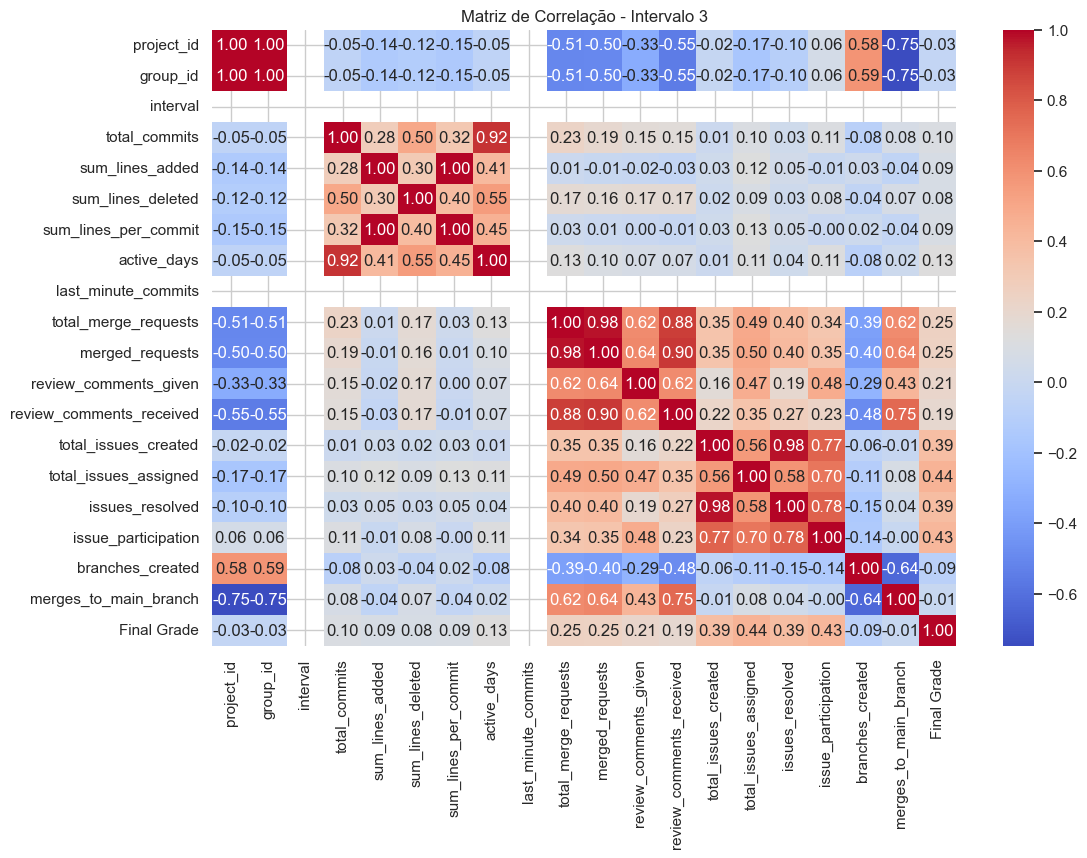

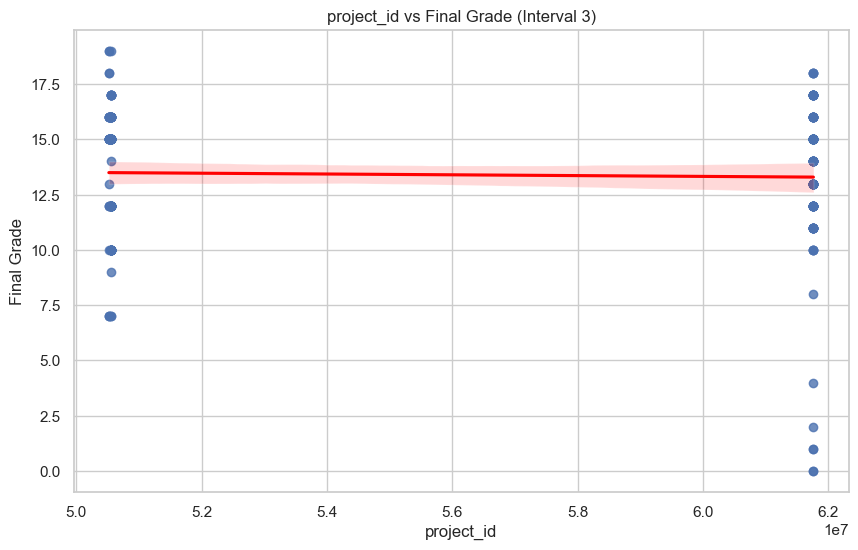

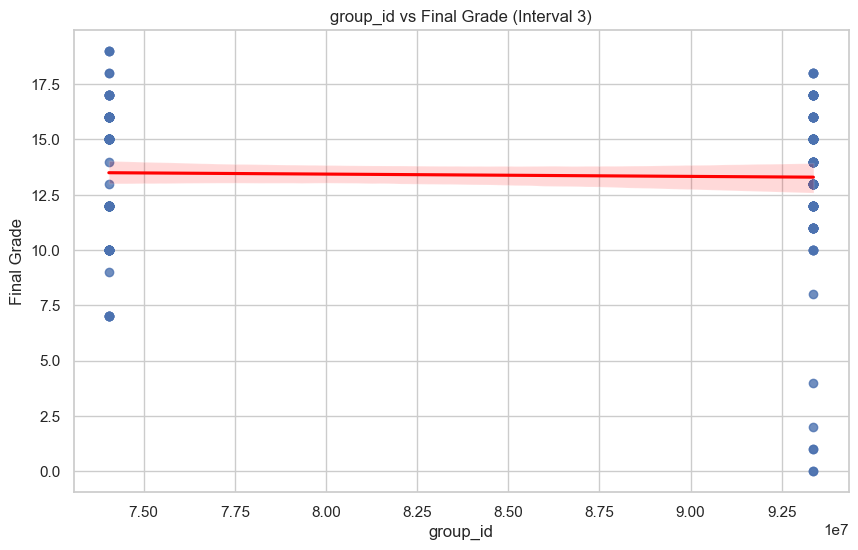

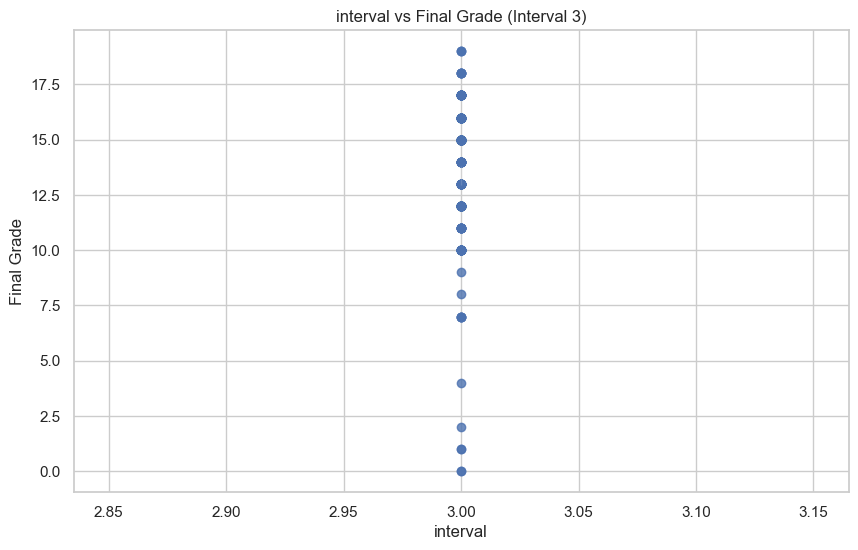

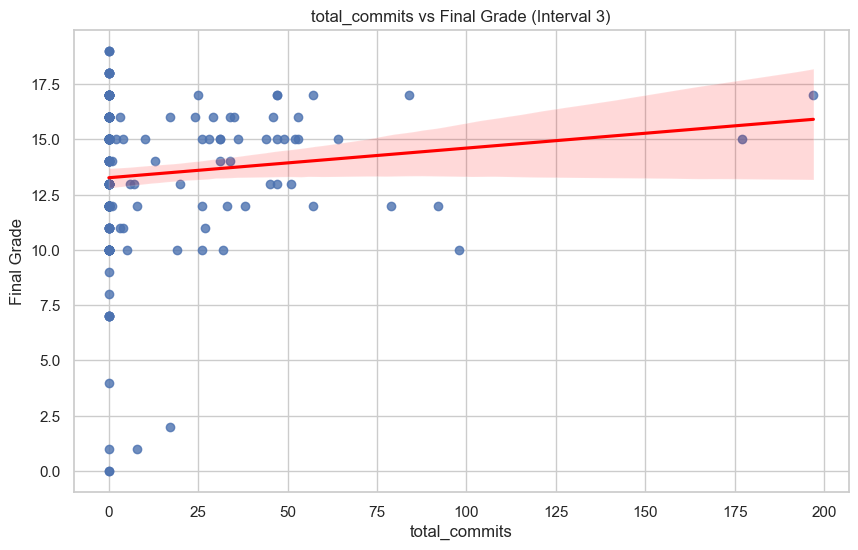

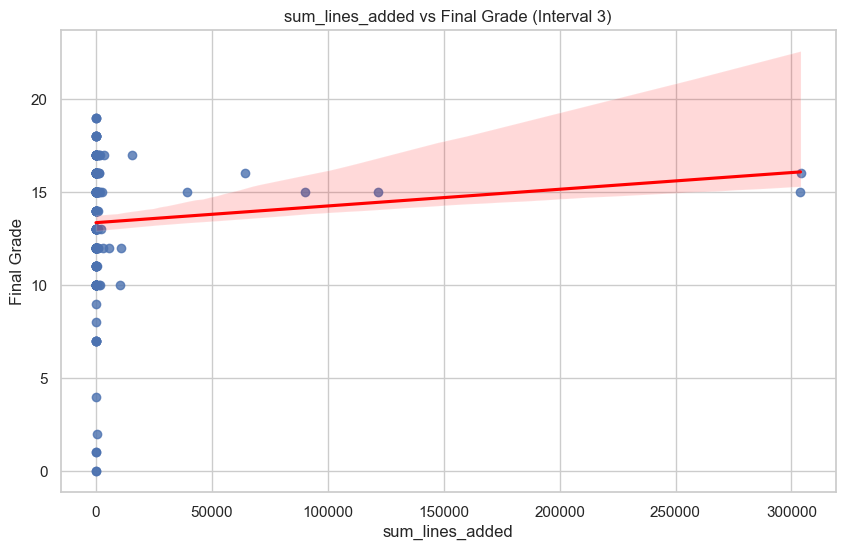

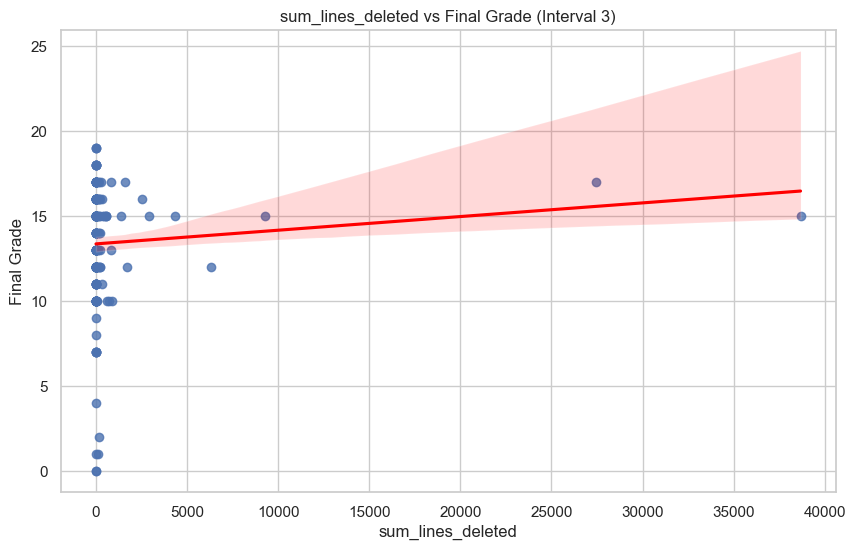

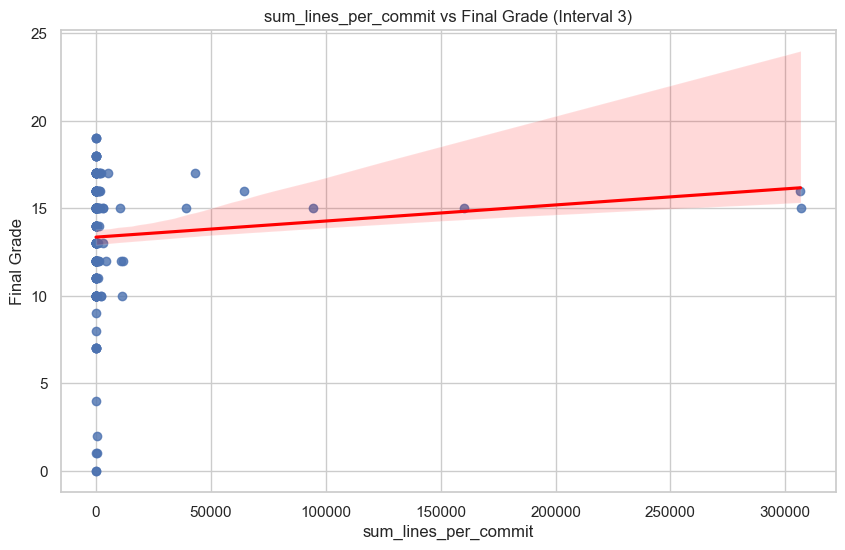

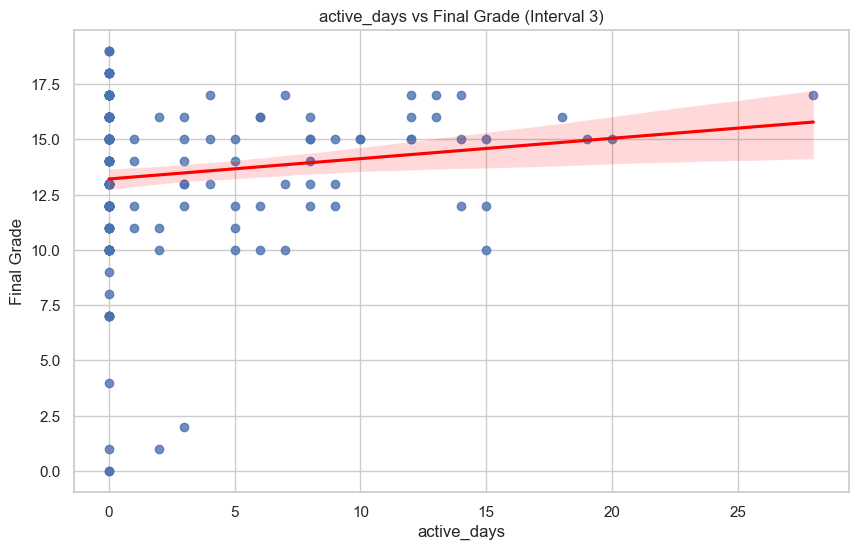

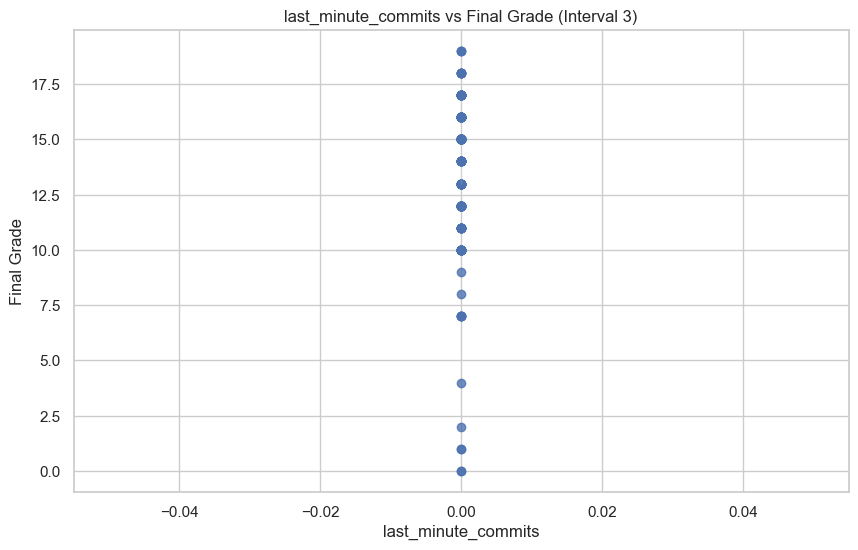

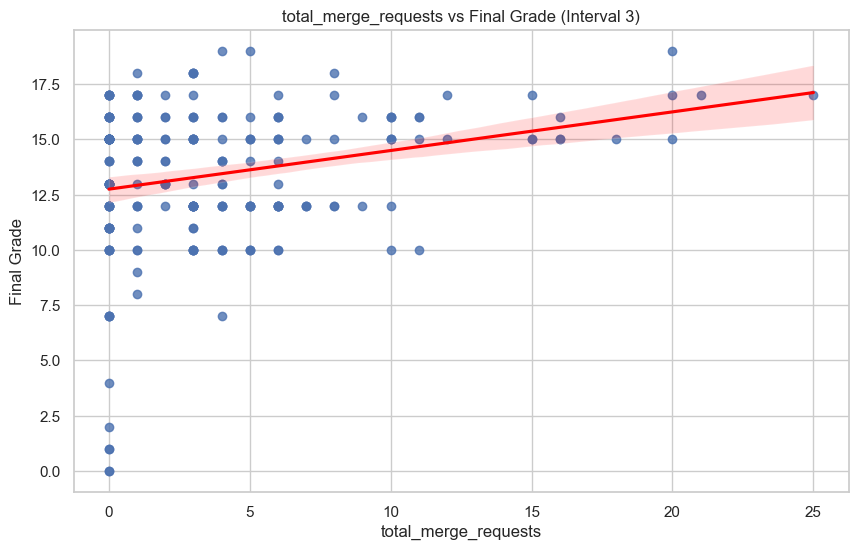

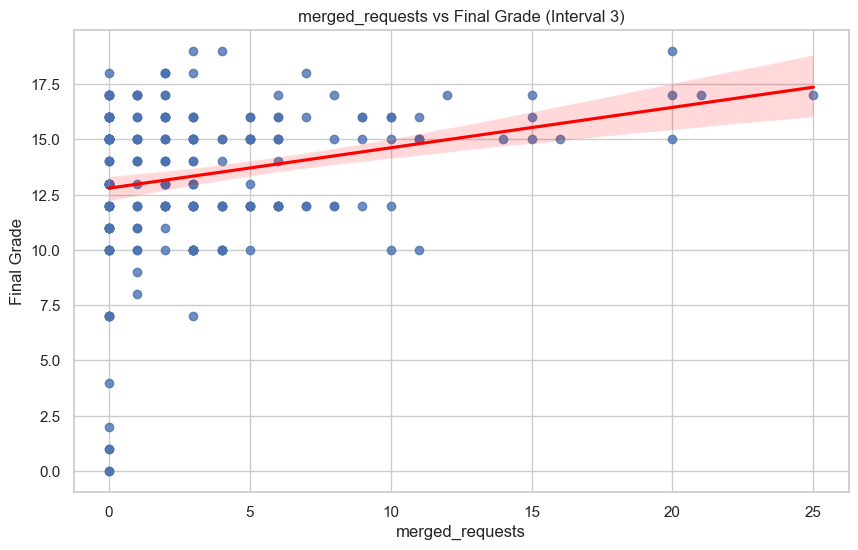

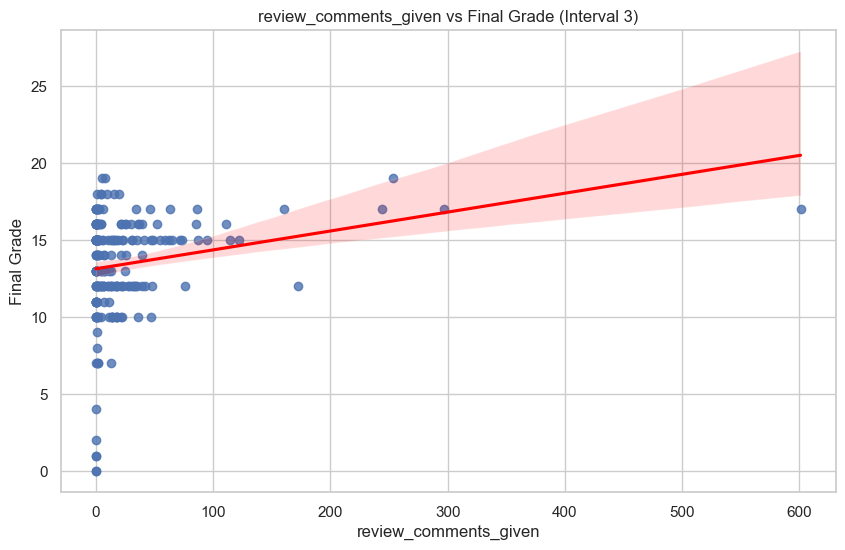

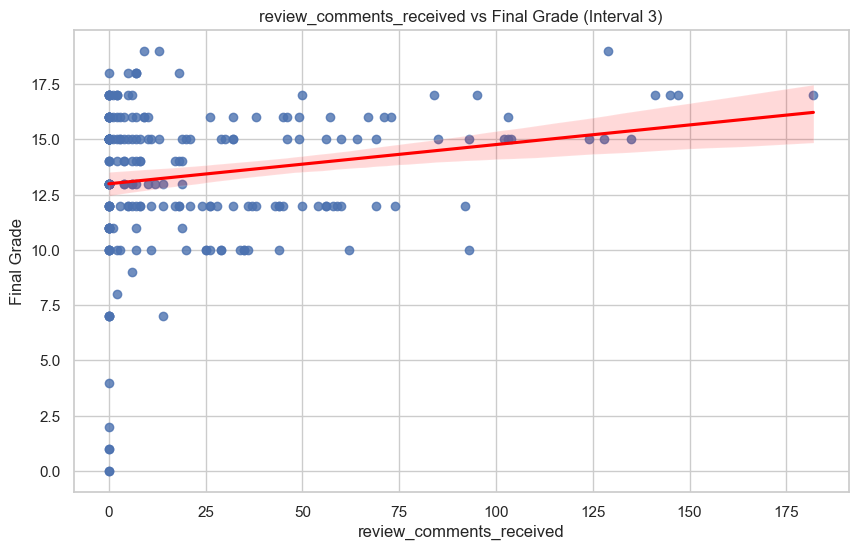

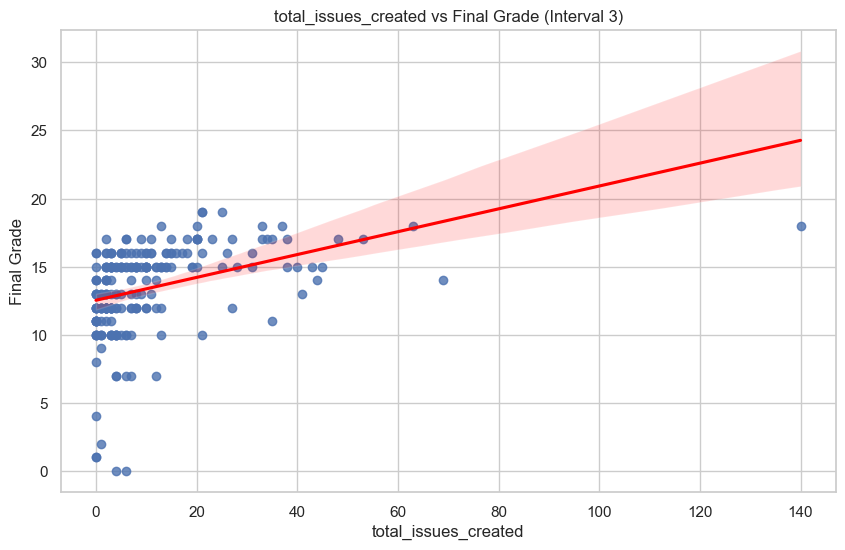

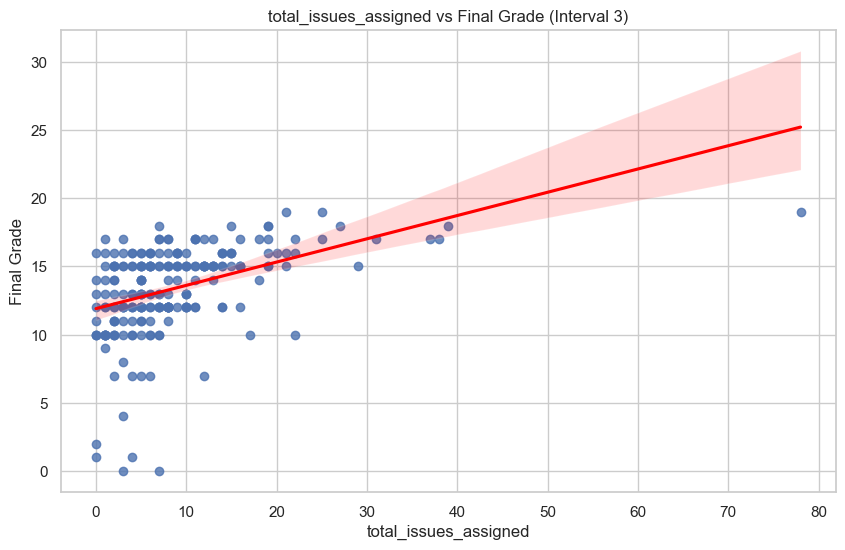

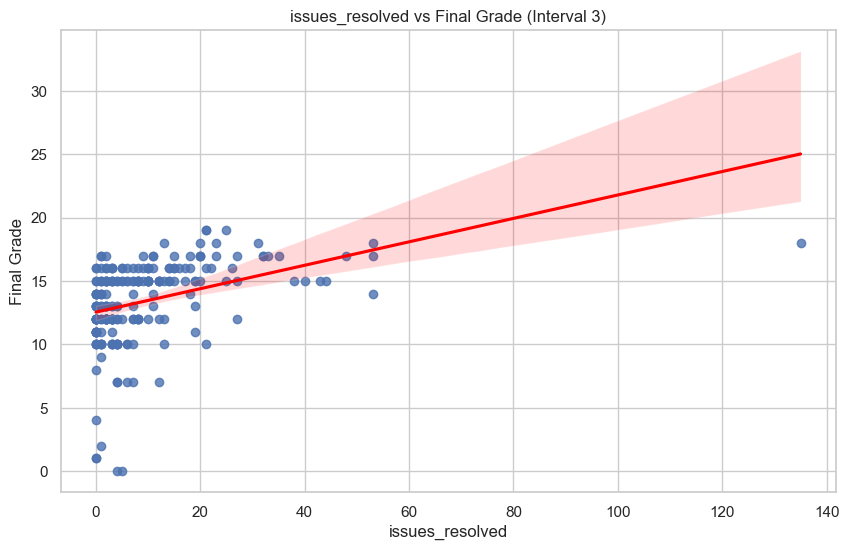

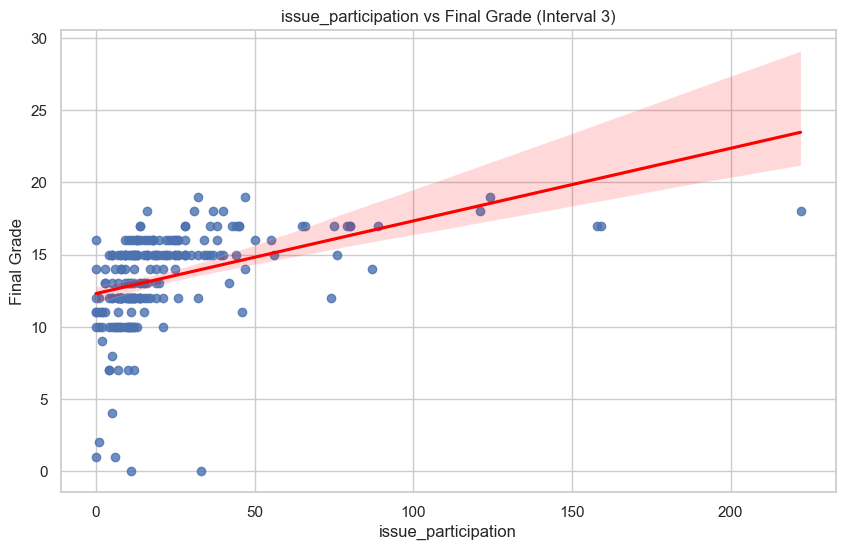

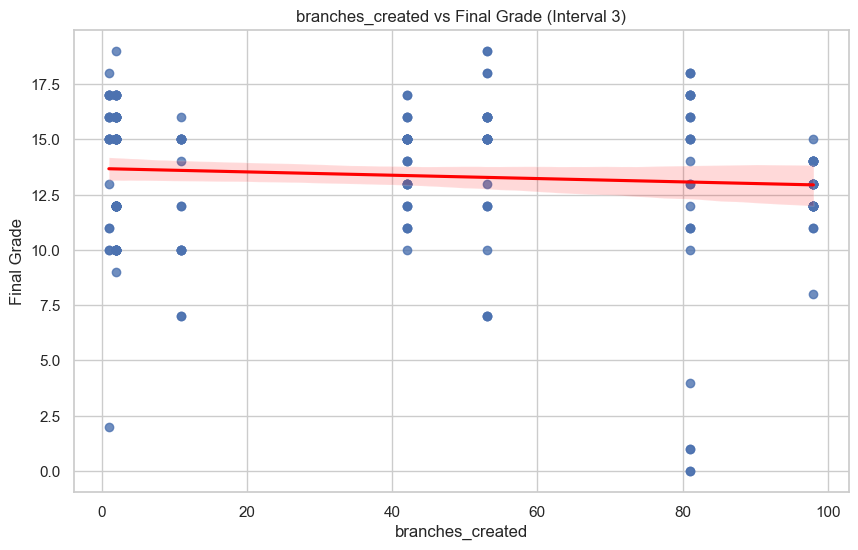

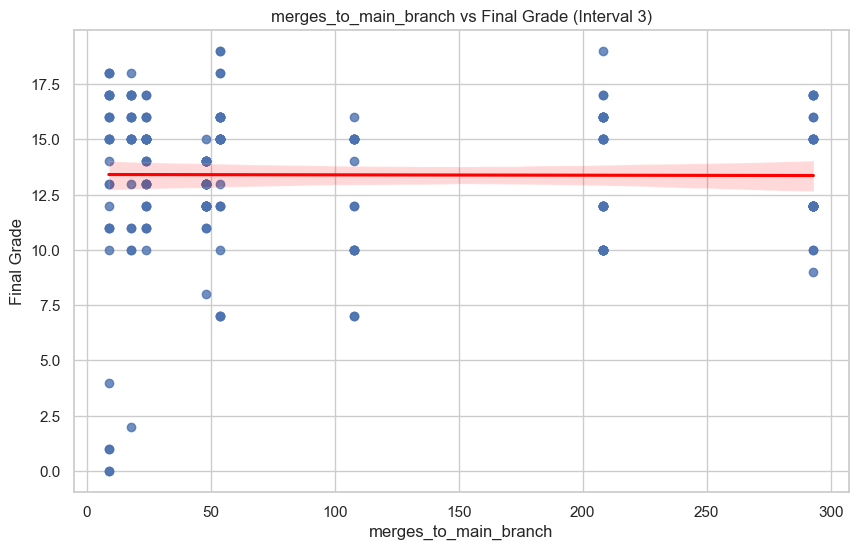

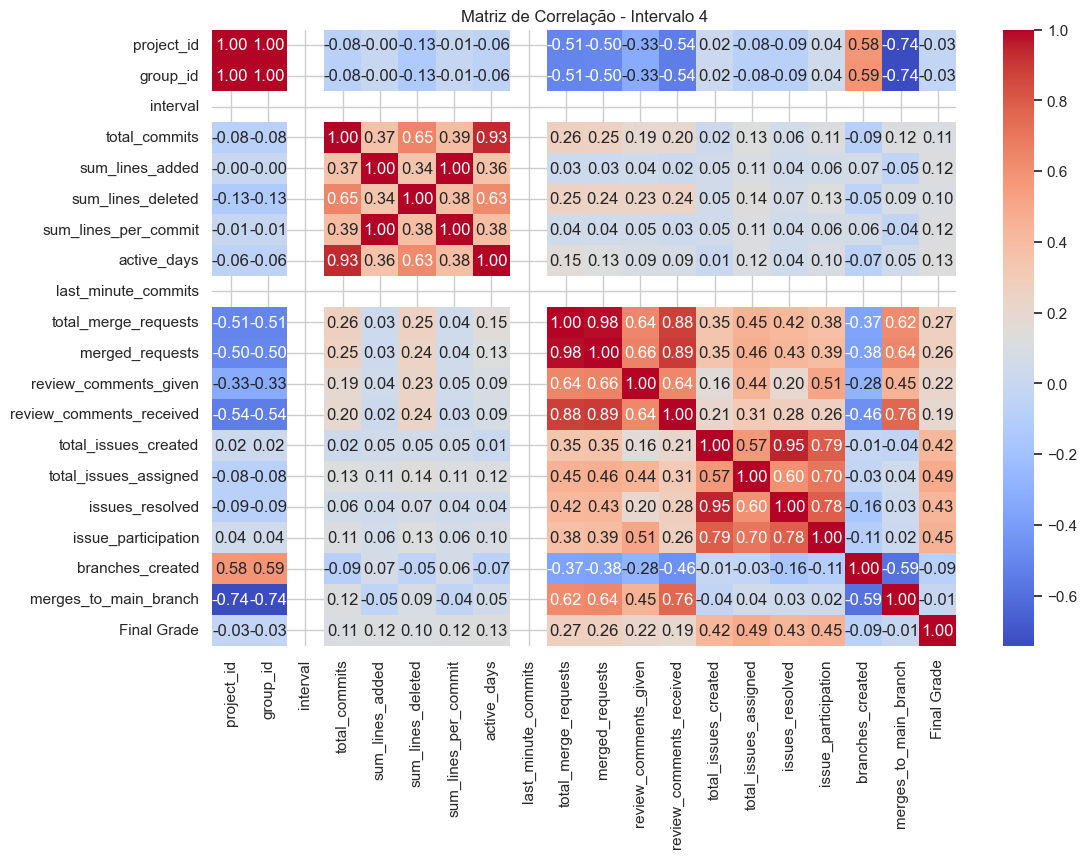

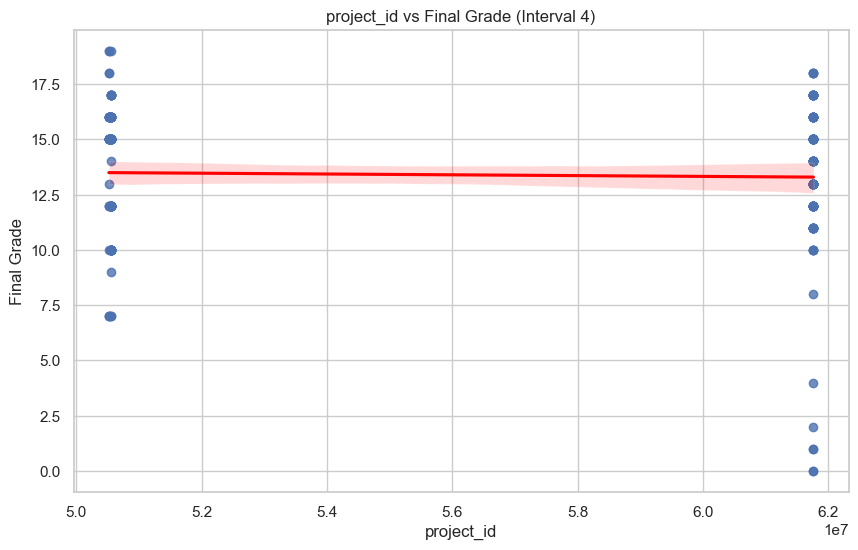

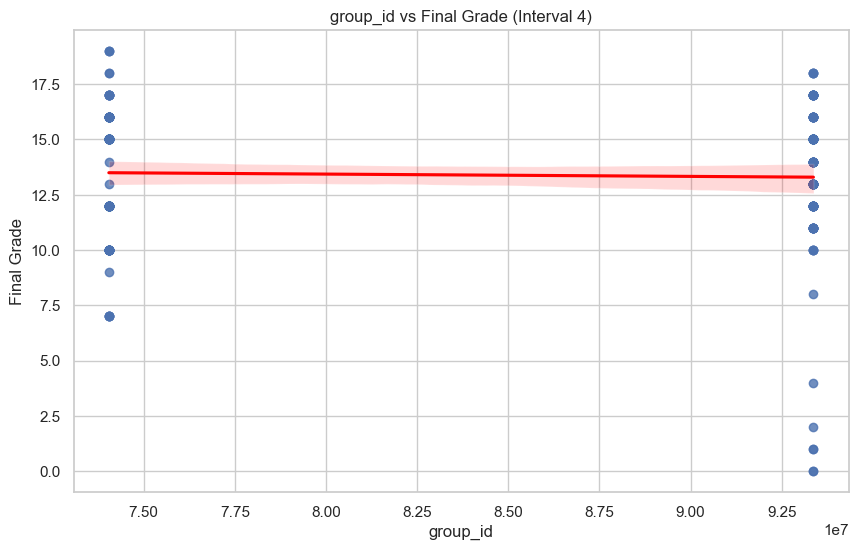

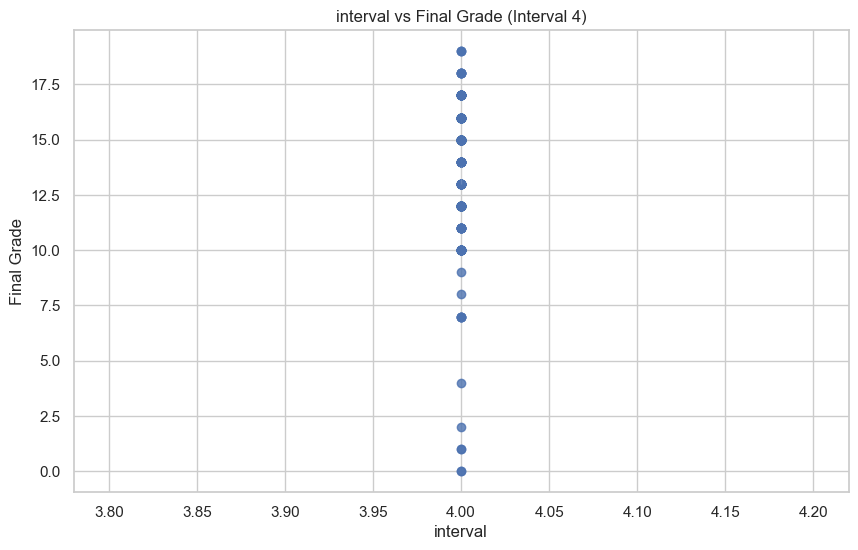

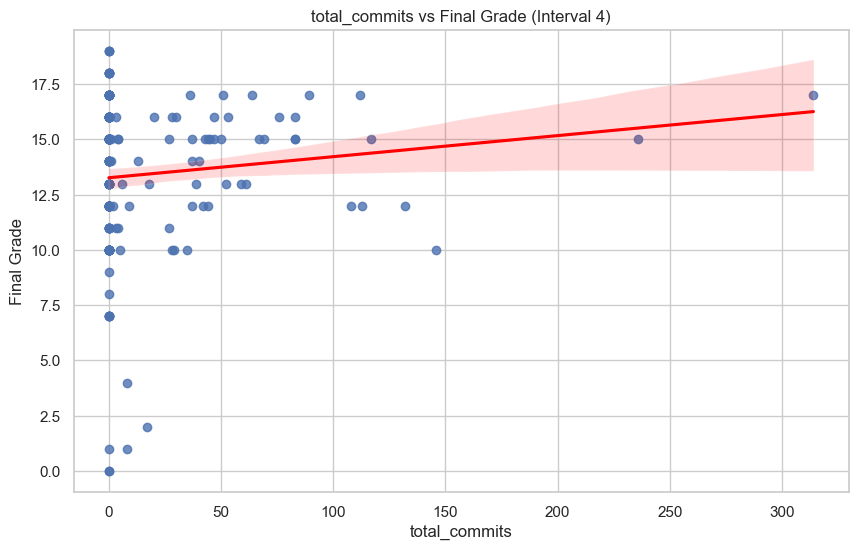

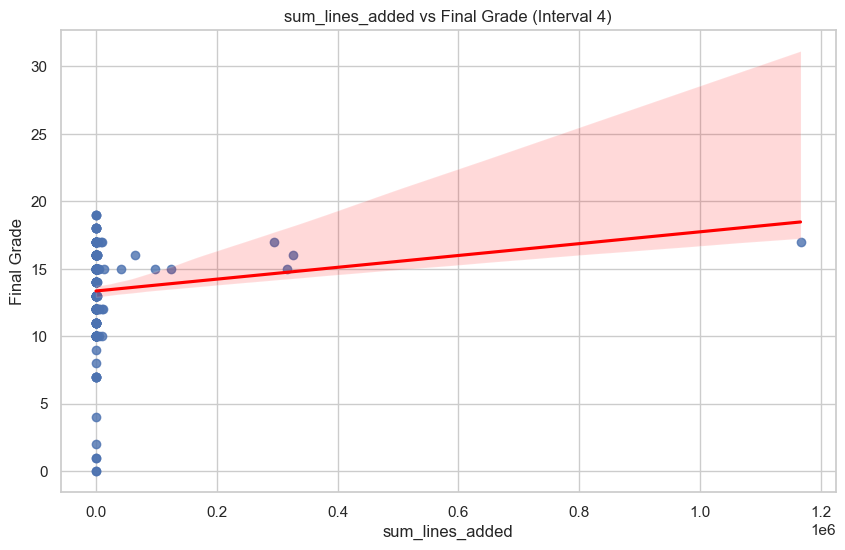

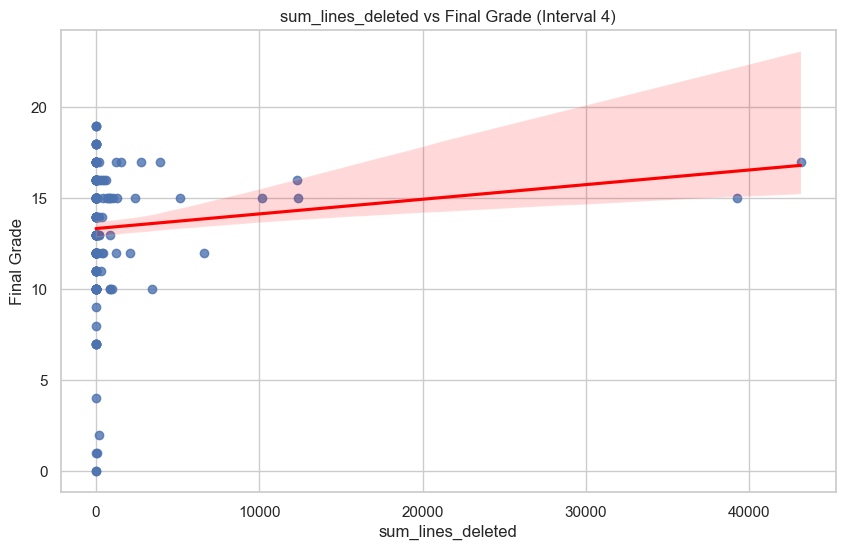

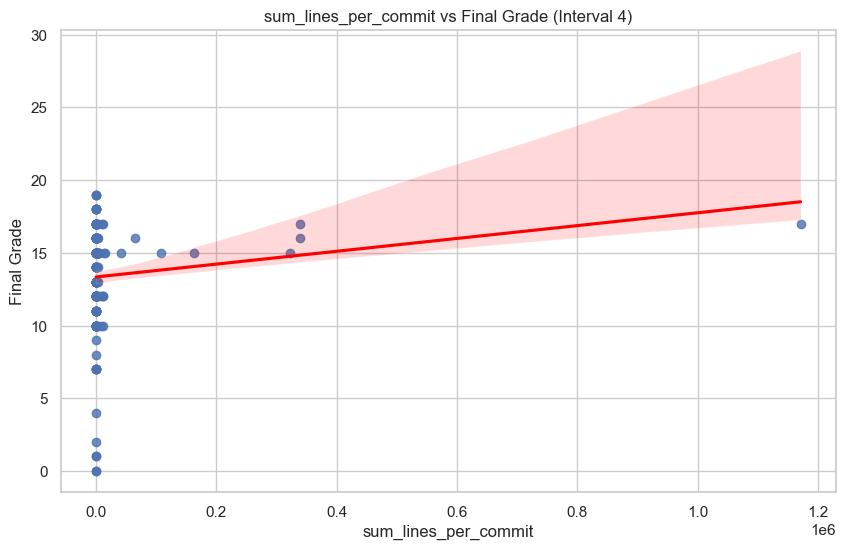

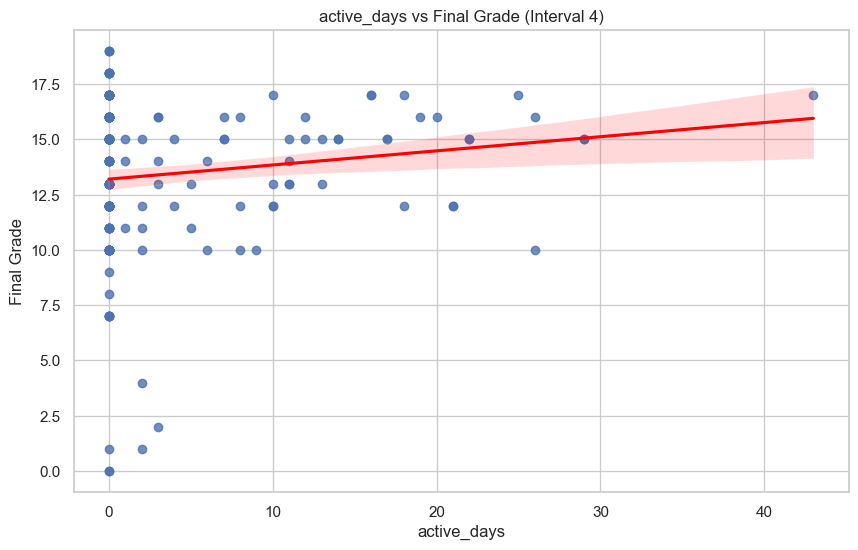

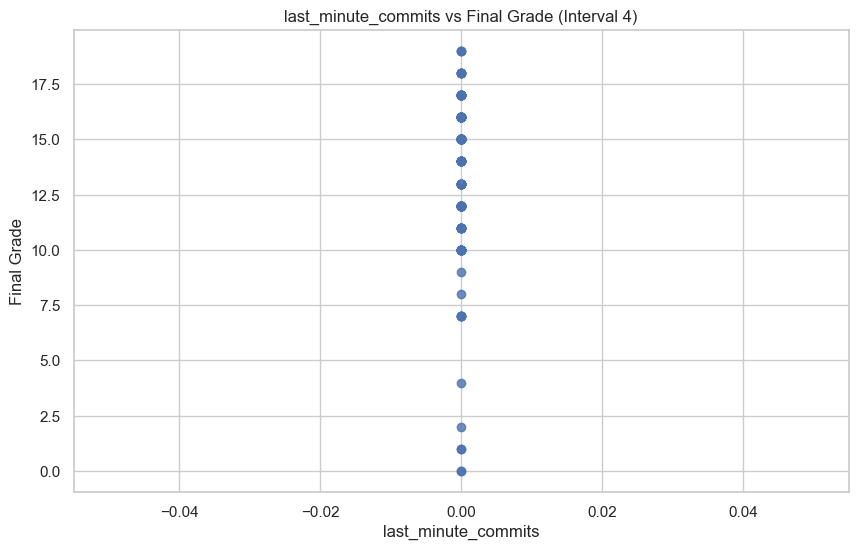

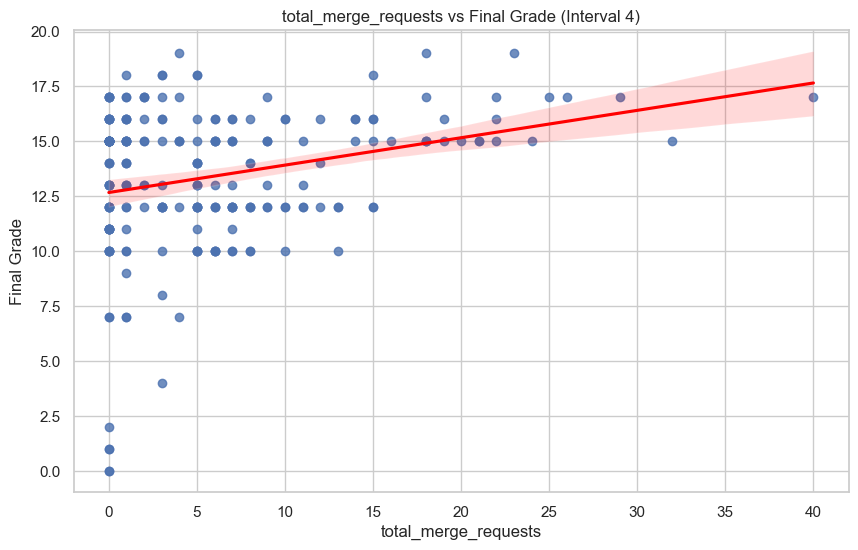

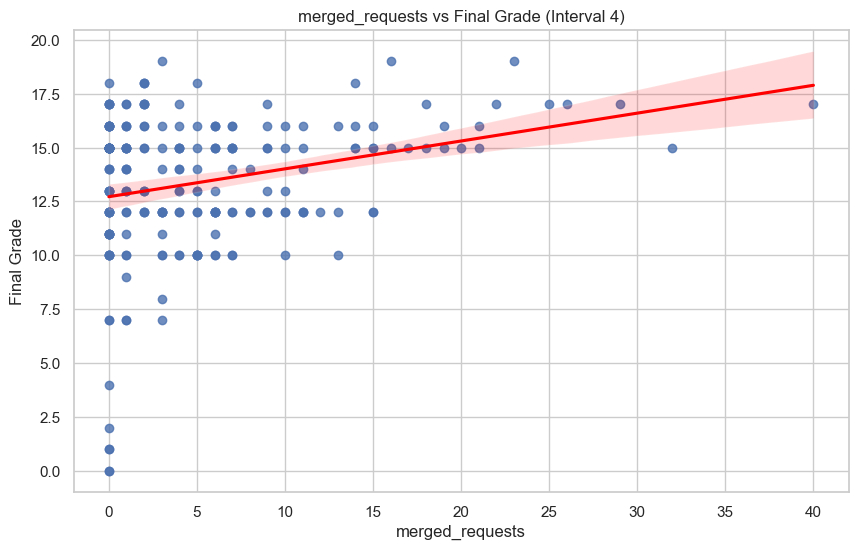

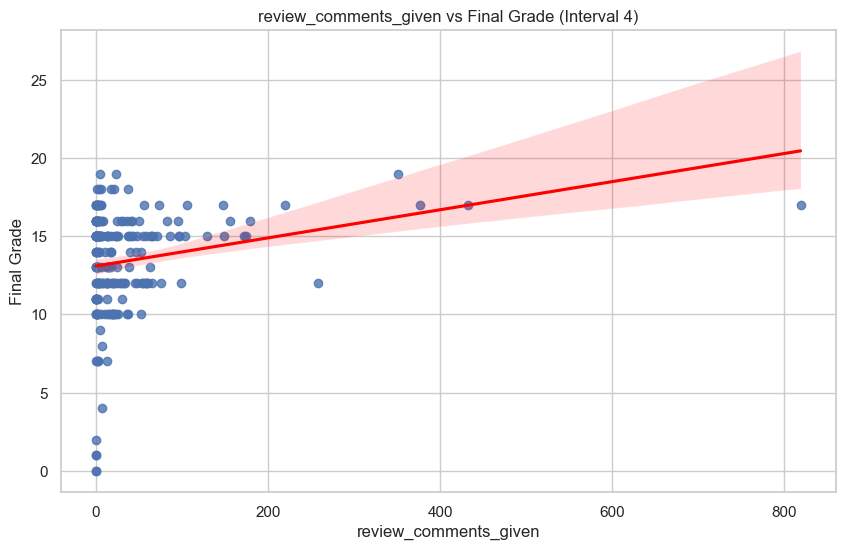

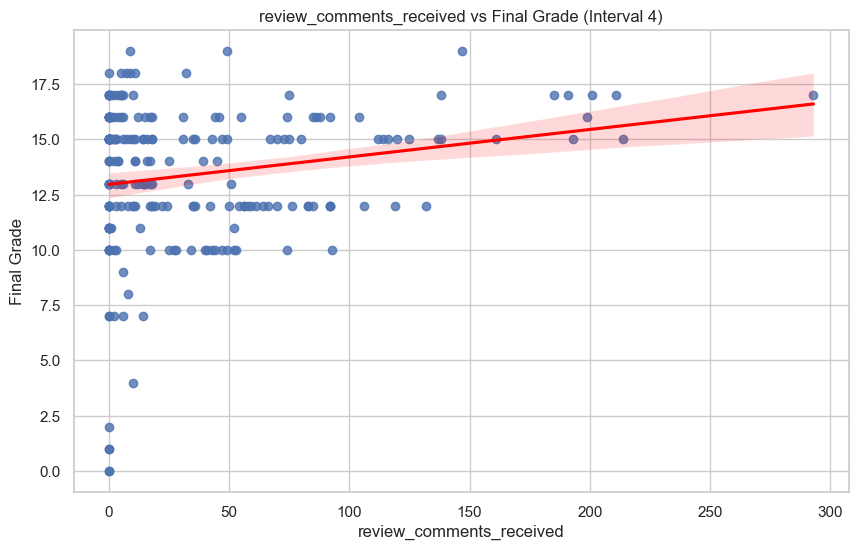

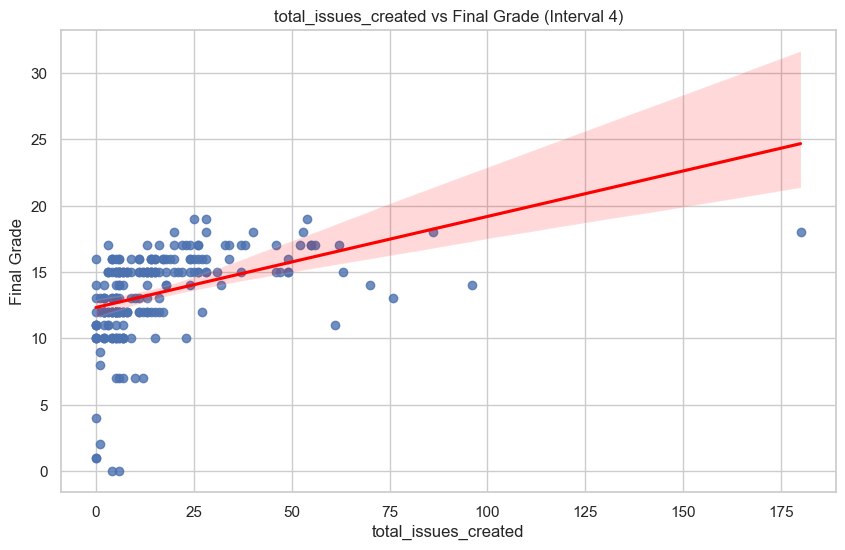

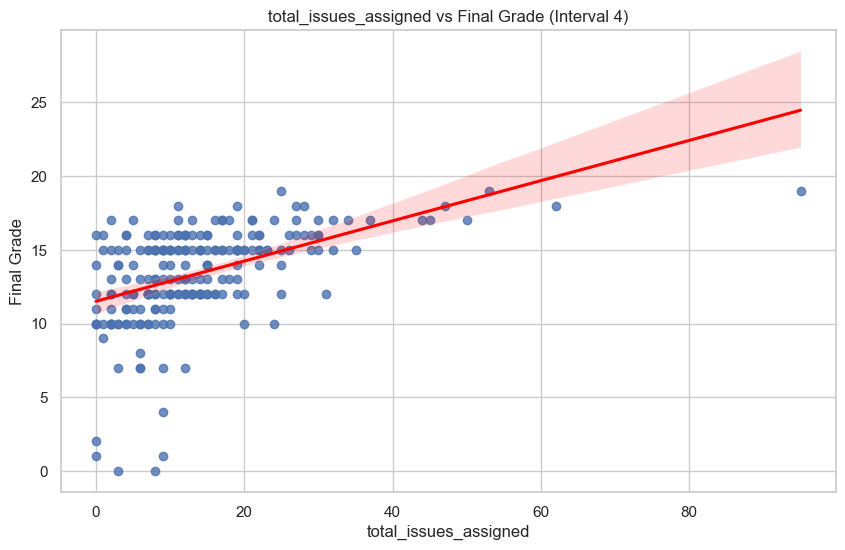

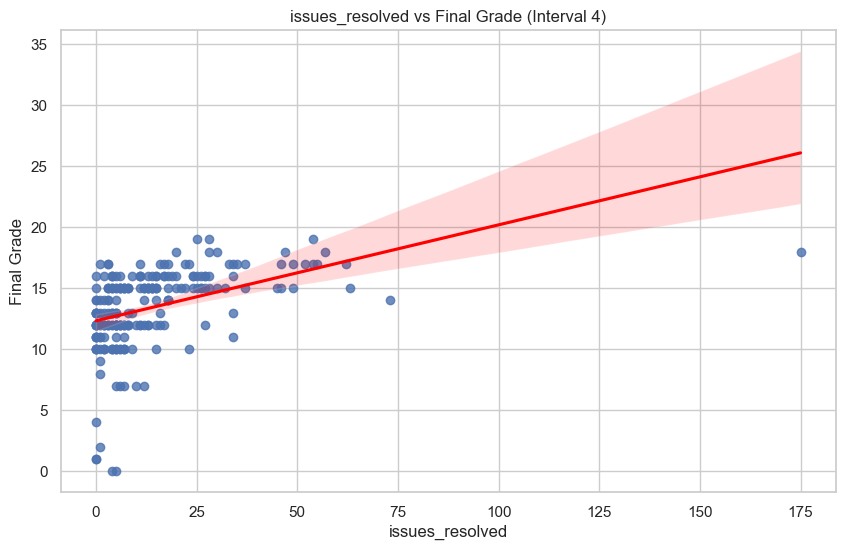

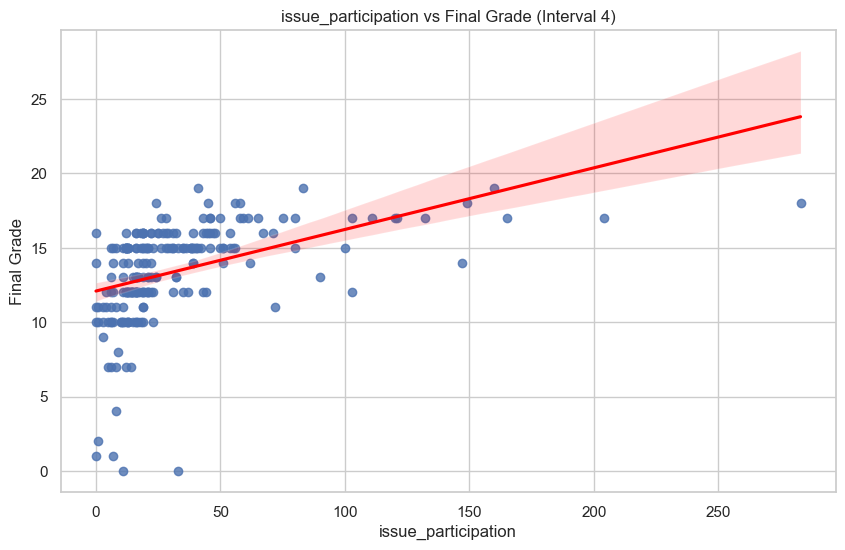

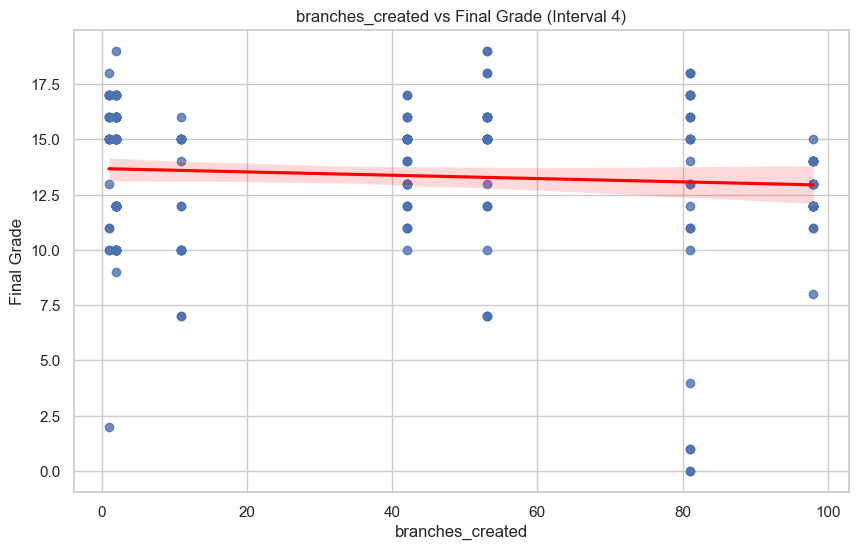

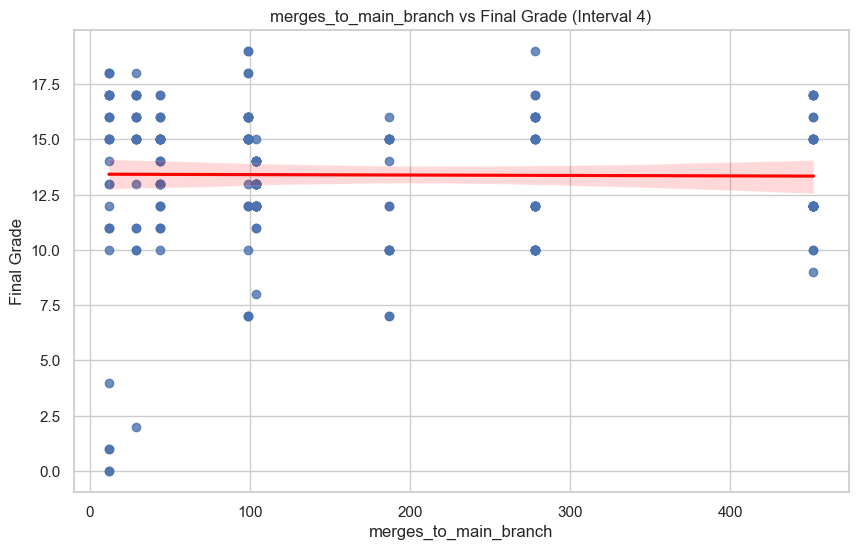

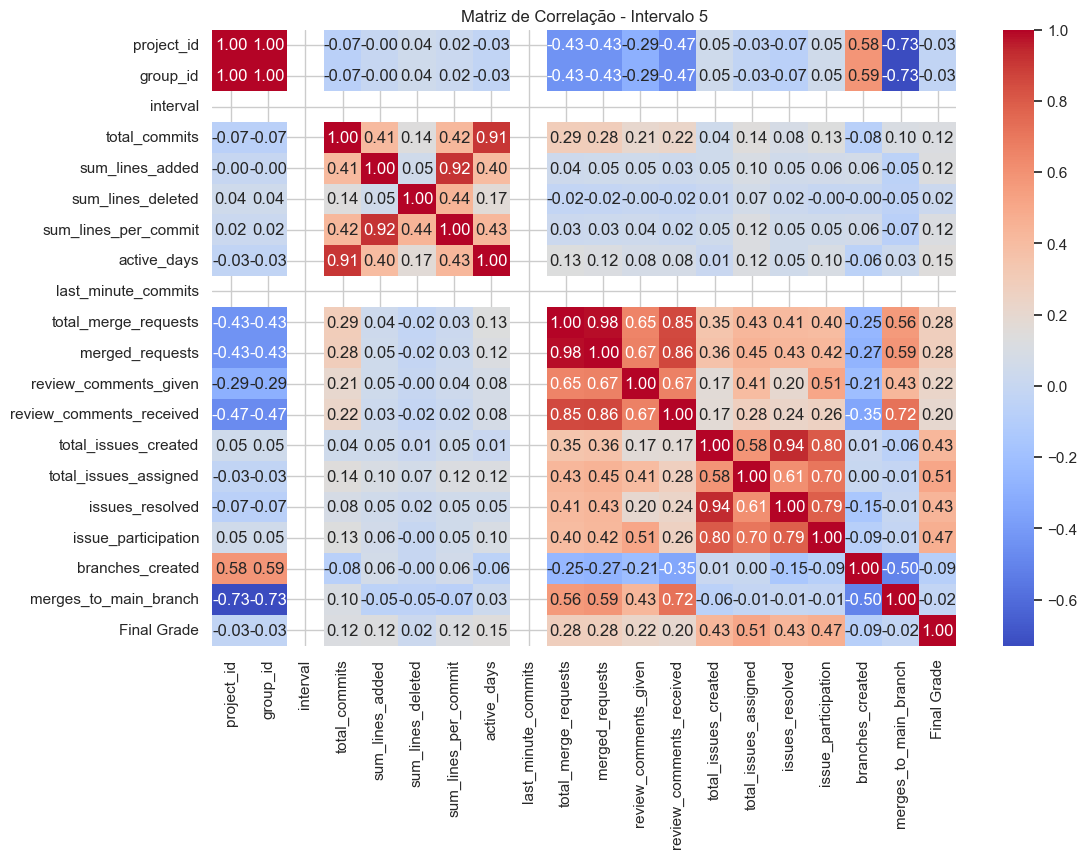

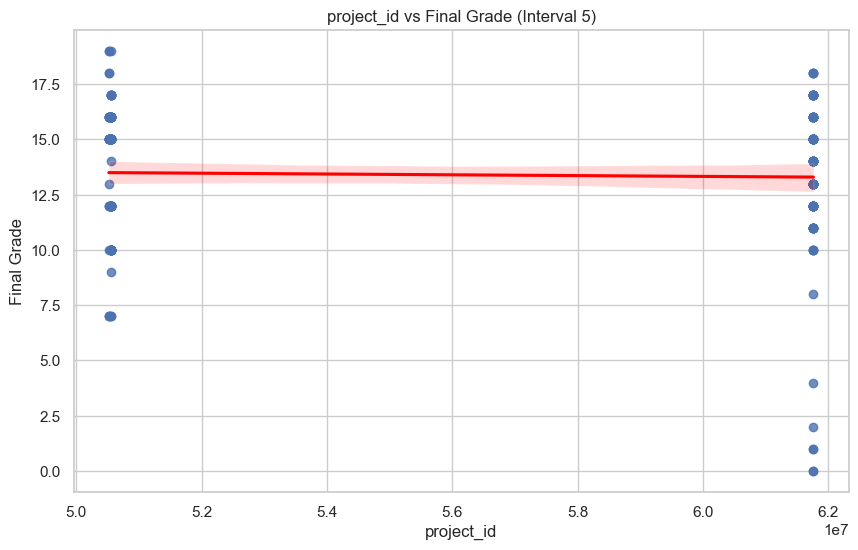

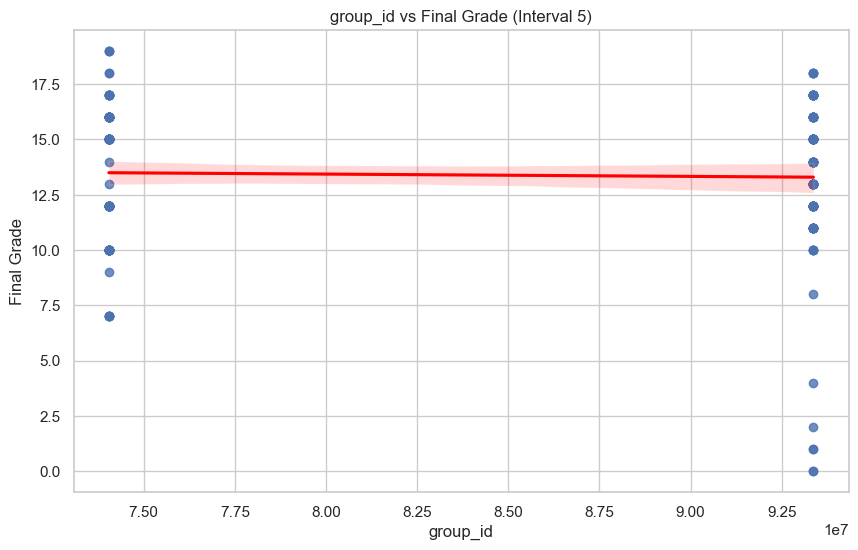

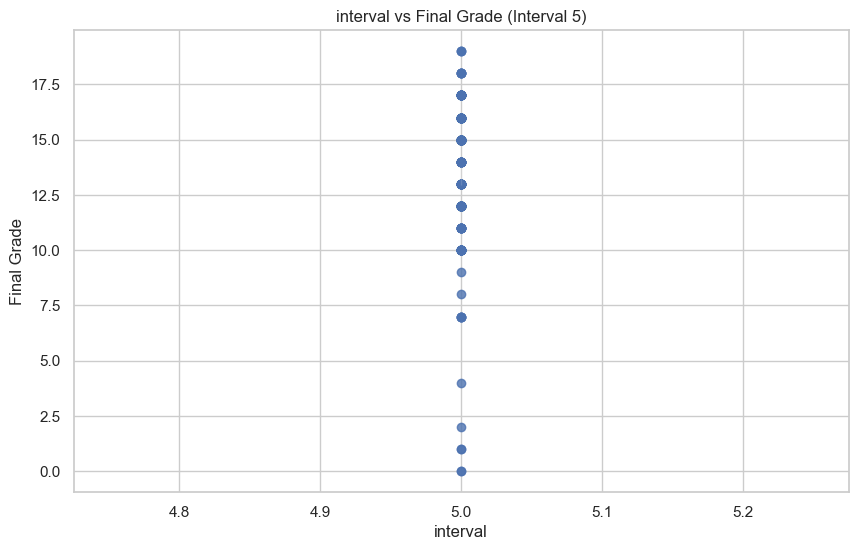

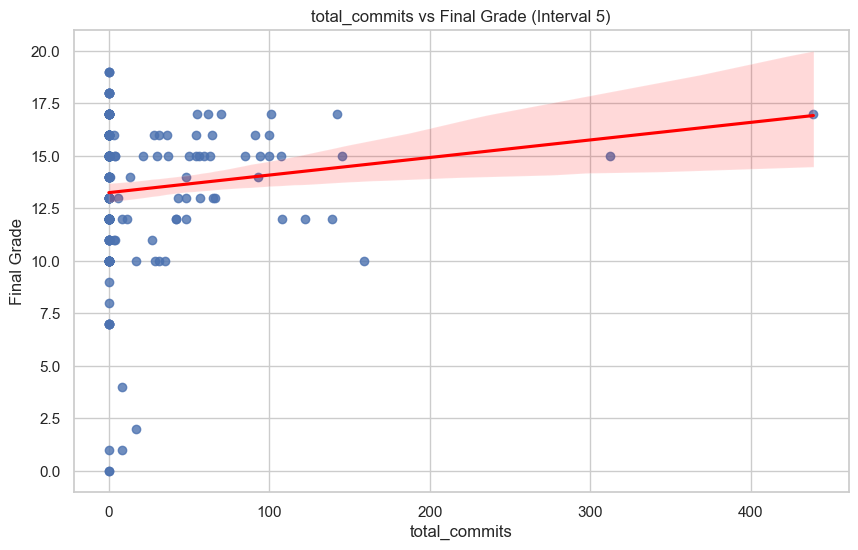

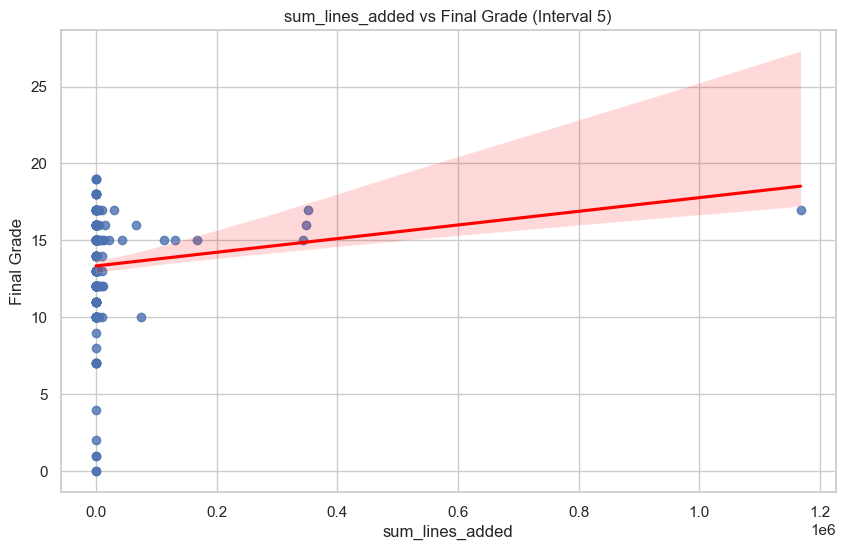

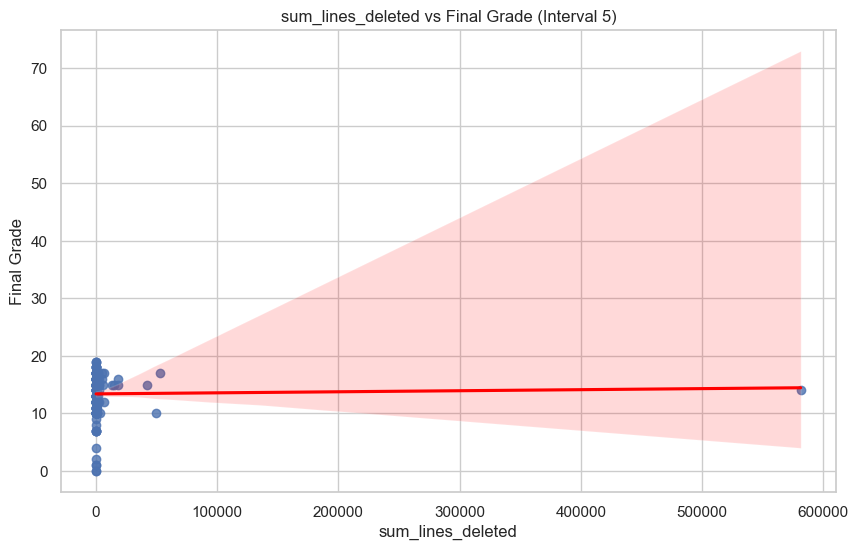

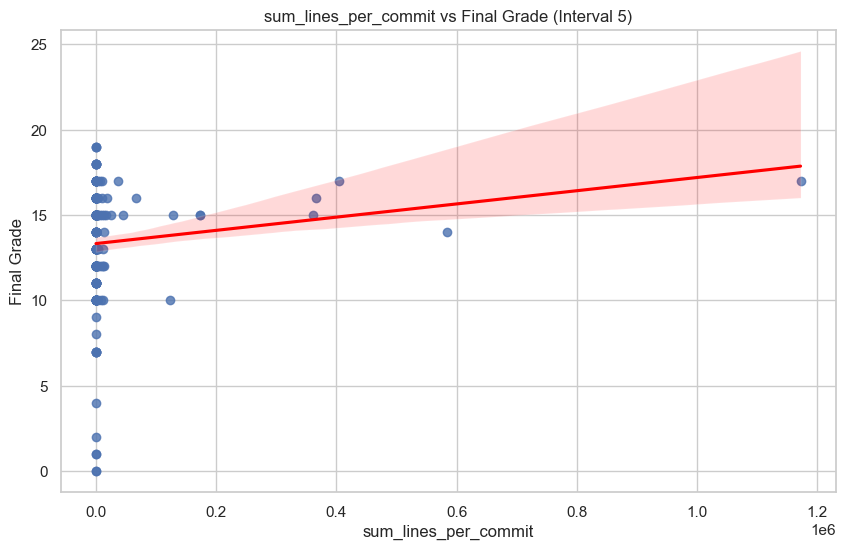

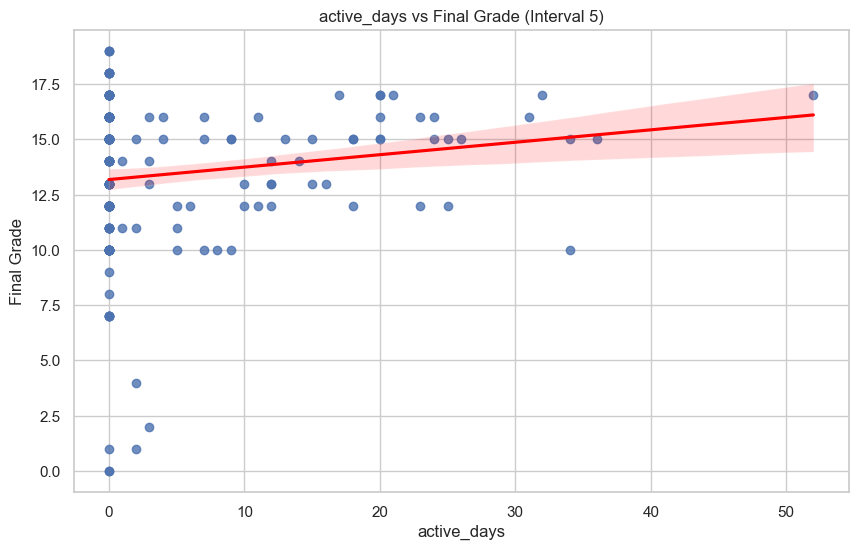

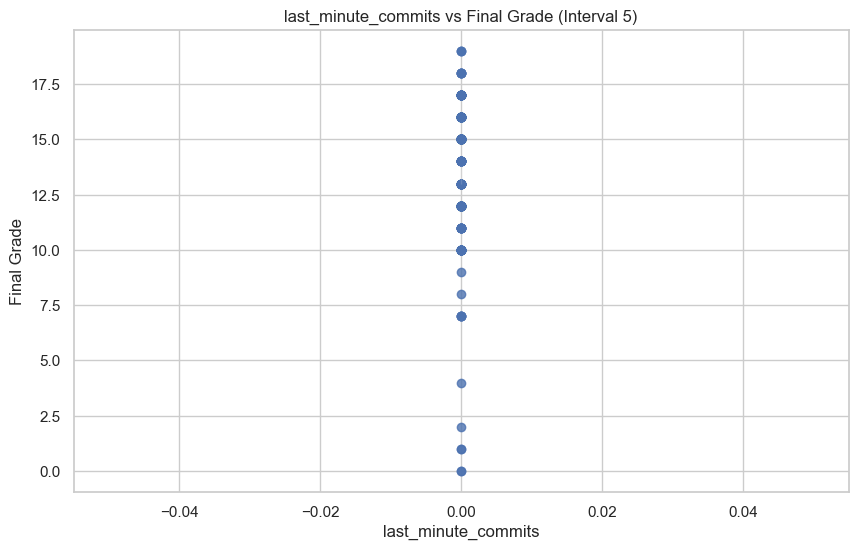

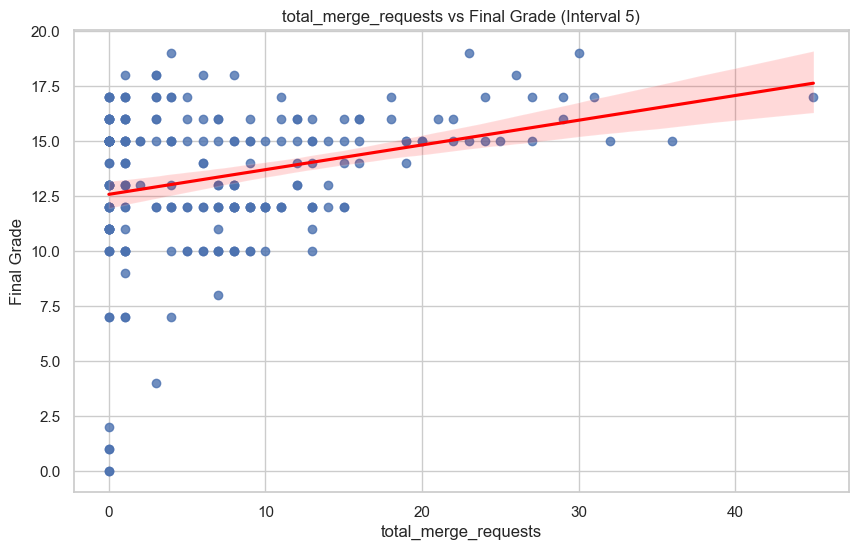

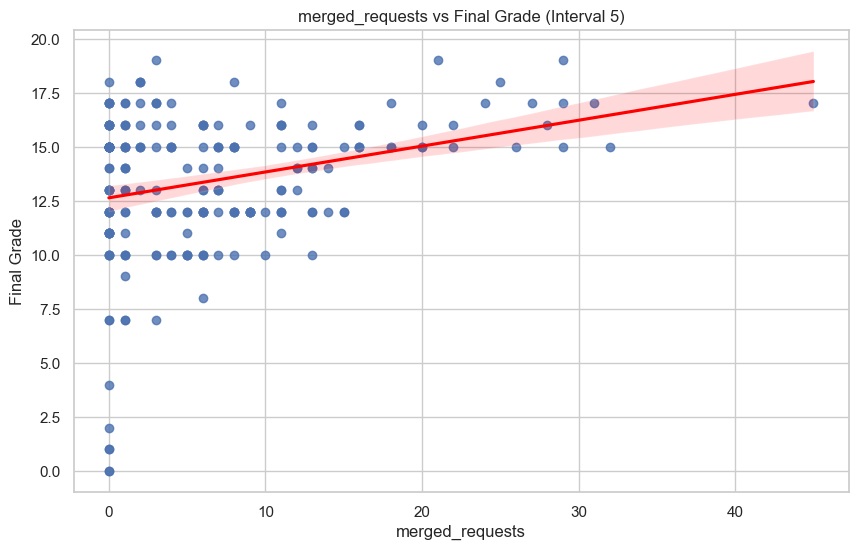

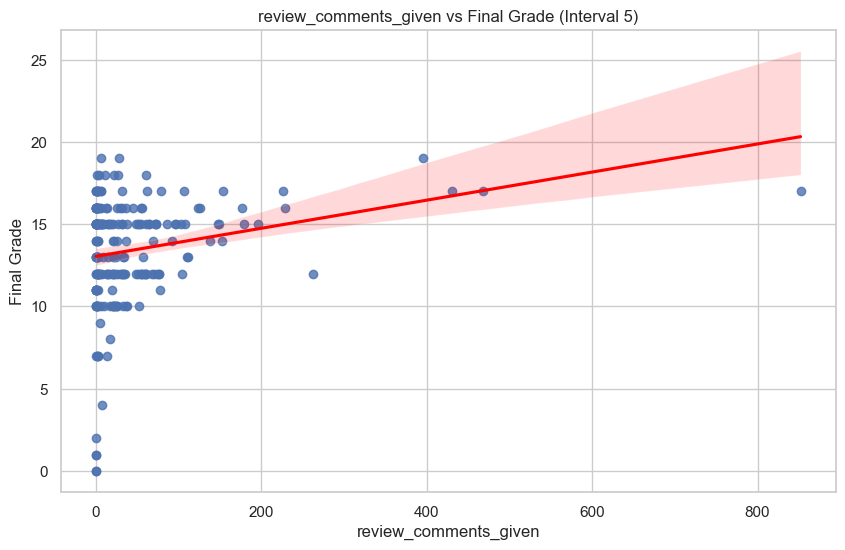

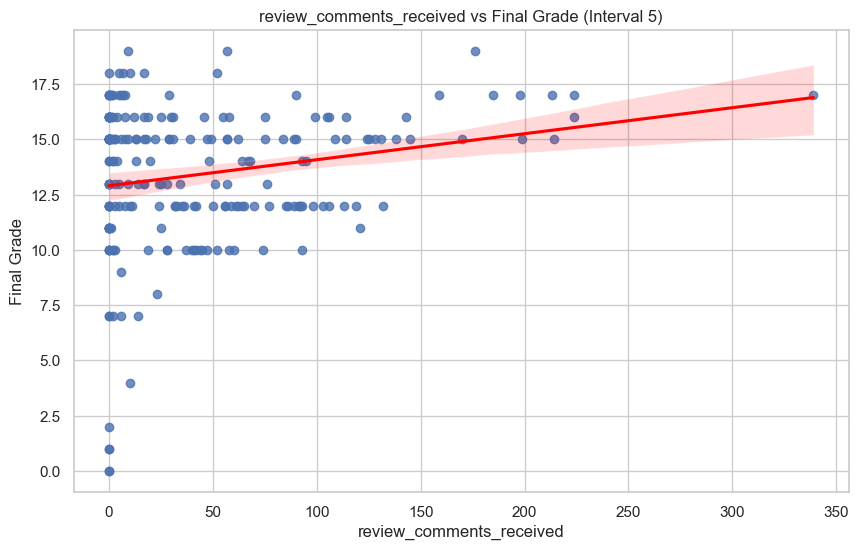

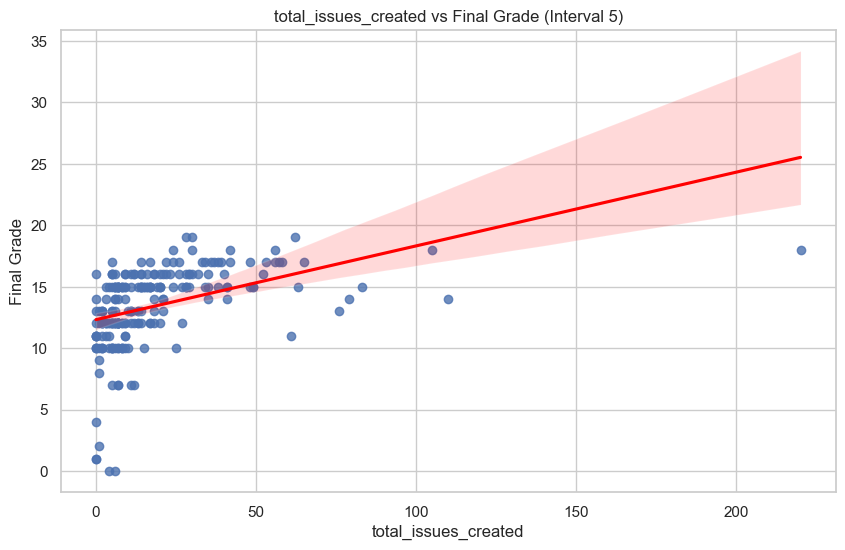

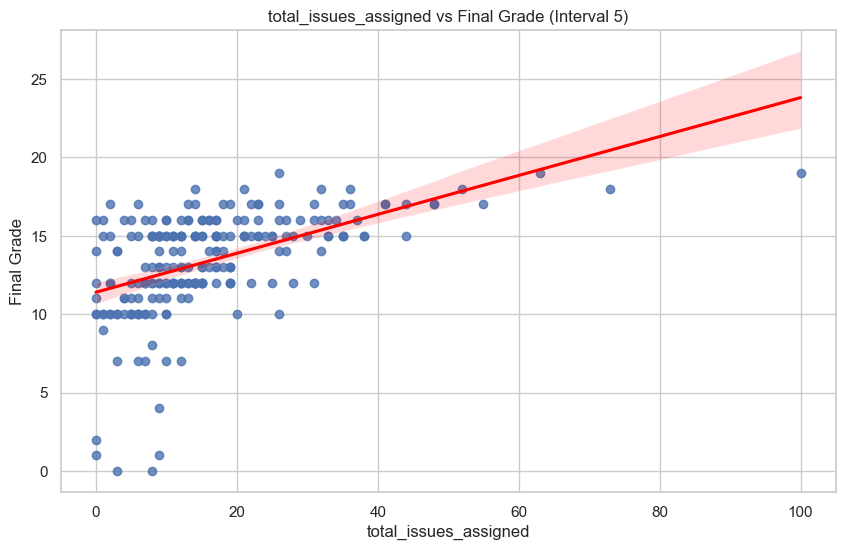

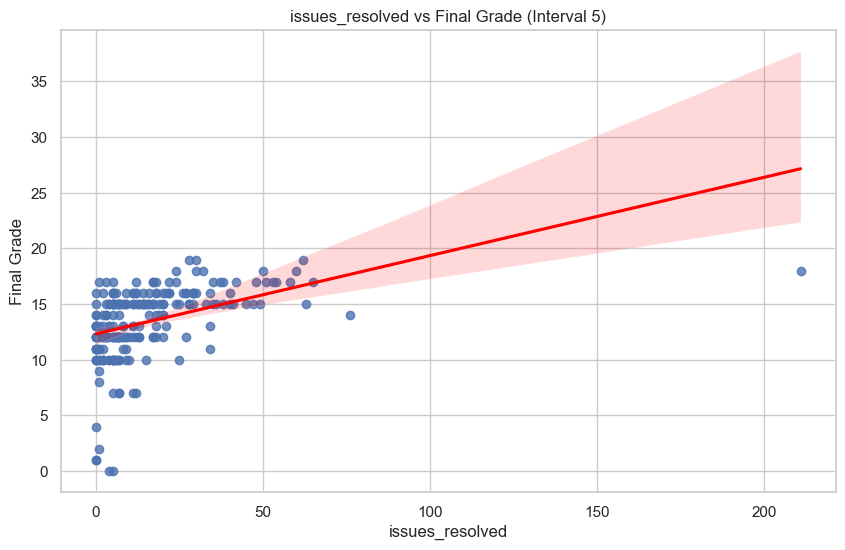

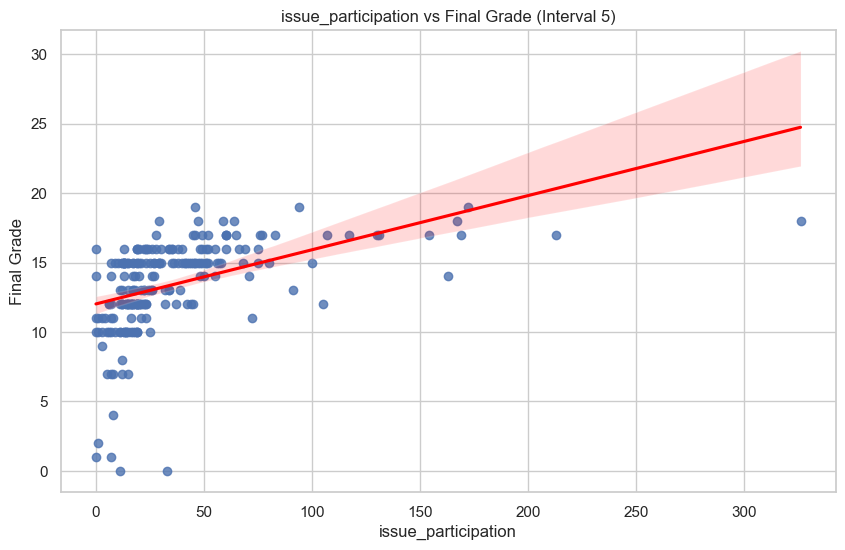

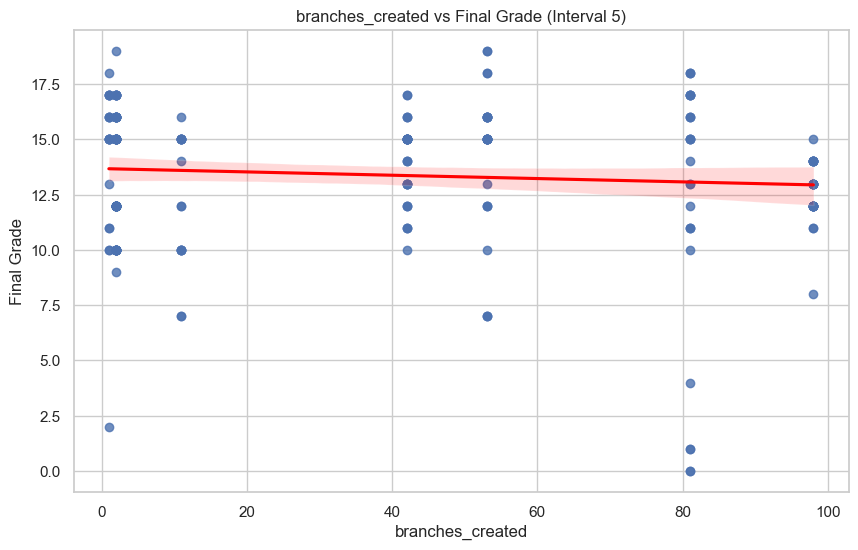

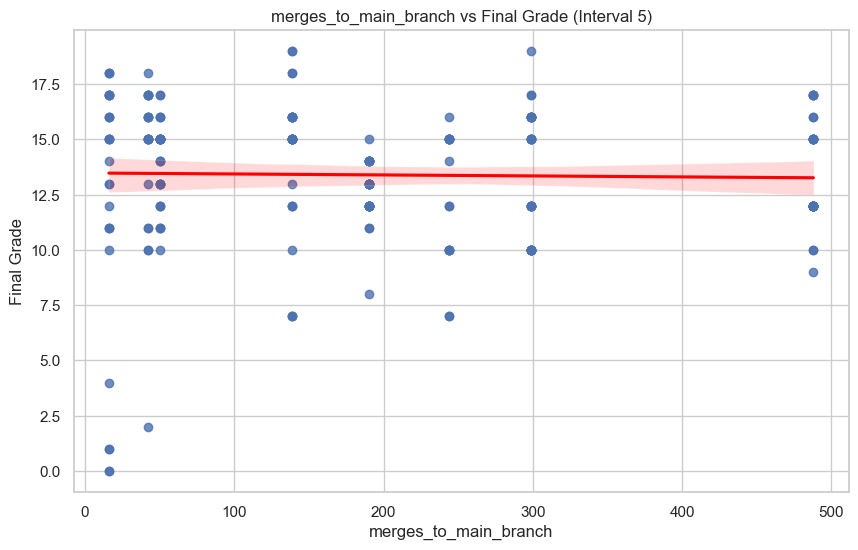

In [11]:
for i in range(1, 6):
    df = pd.read_csv(f"student_features_interval_{i}.csv")
    
    # Correlação
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f"Matriz de Correlação - Intervalo {i}")
    plt.show()

    # Gráficos de dispersão por feature
    for col in df.drop(columns=['Final Grade']).select_dtypes(include=np.number).columns:
        sns.regplot(data=df, x=col, y="Final Grade", line_kws={"color": "red"})
        plt.title(f"{col} vs Final Grade (Interval {i})")
        plt.xlabel(col)
        plt.ylabel("Final Grade")
        plt.show()


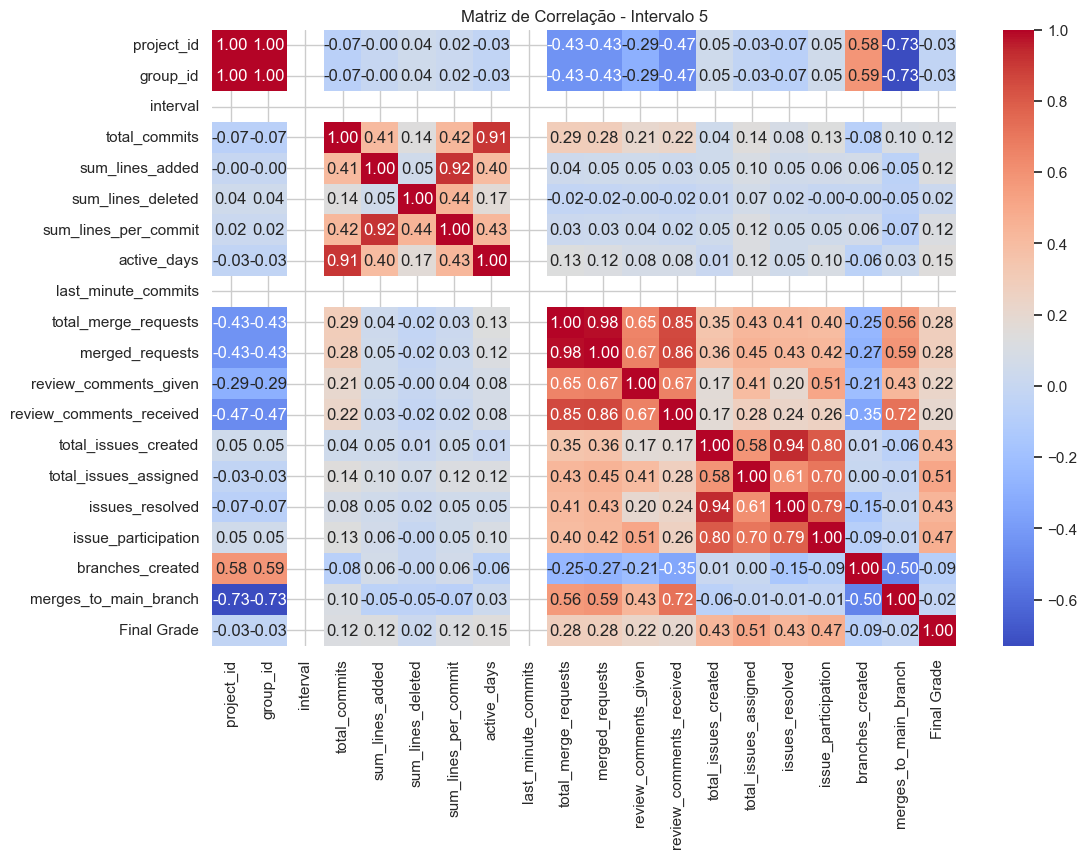

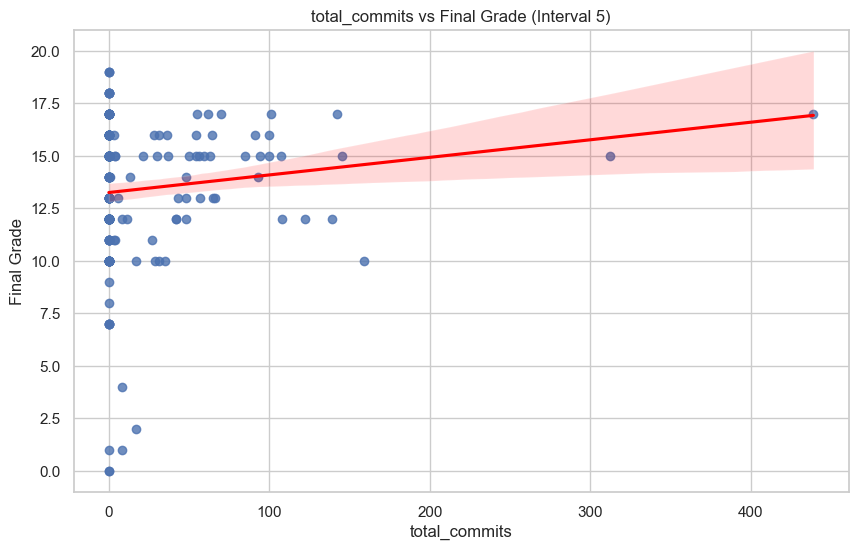

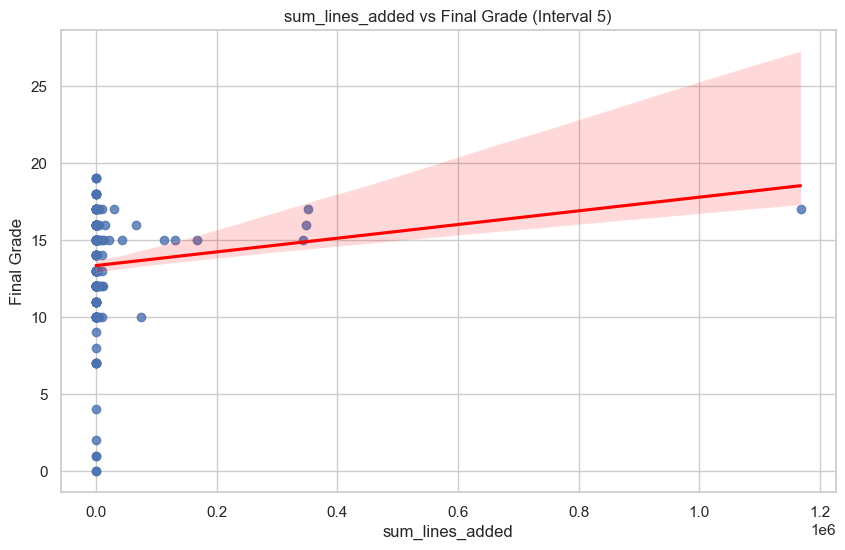

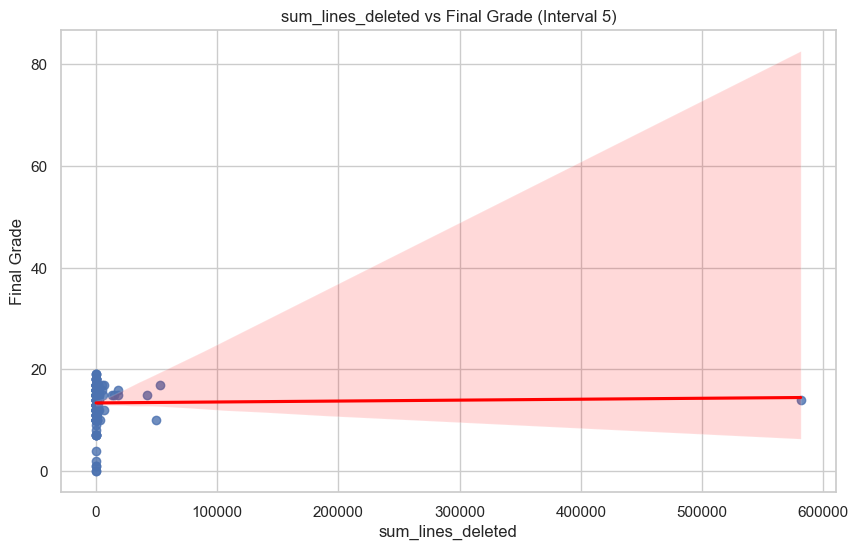

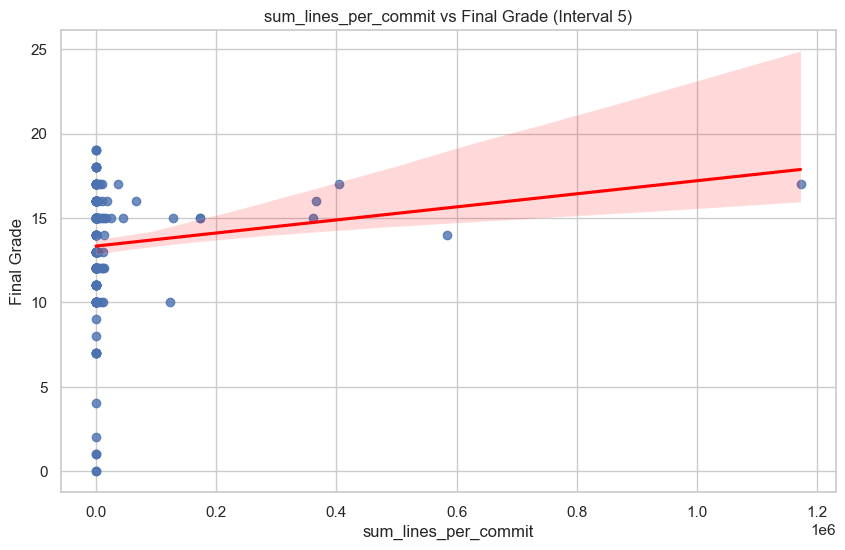

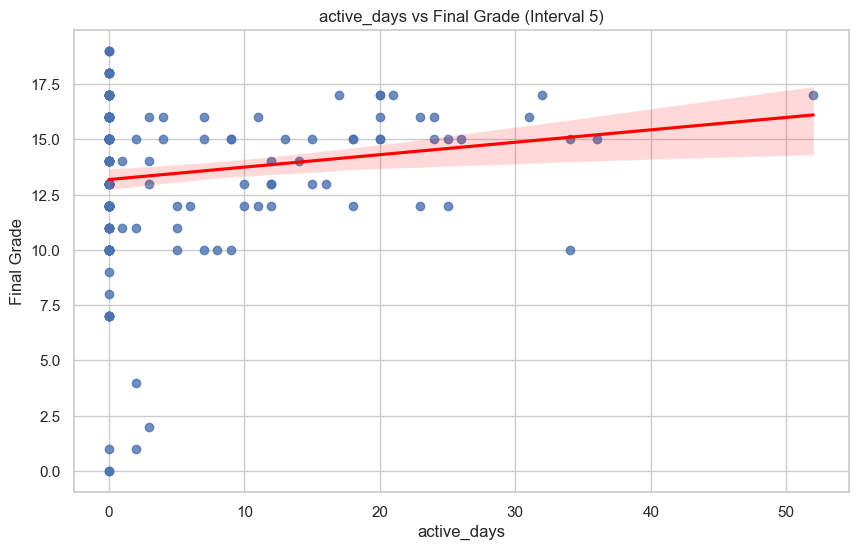

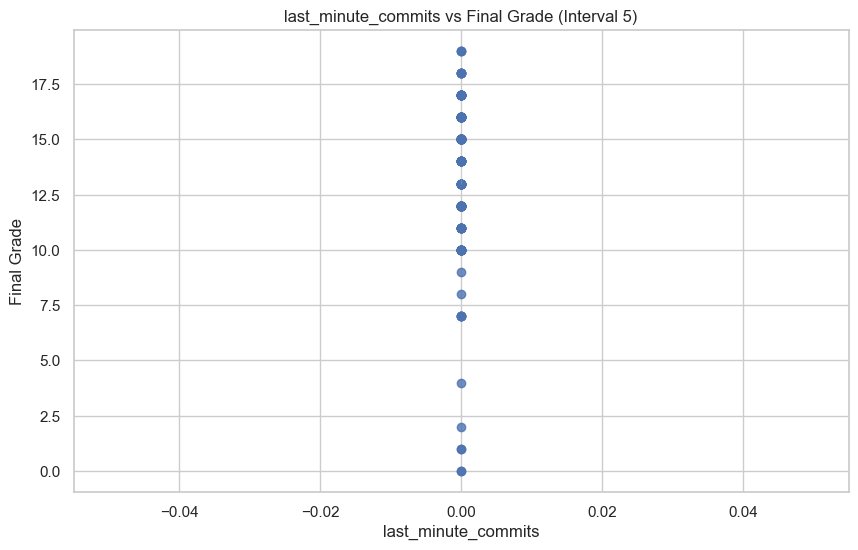

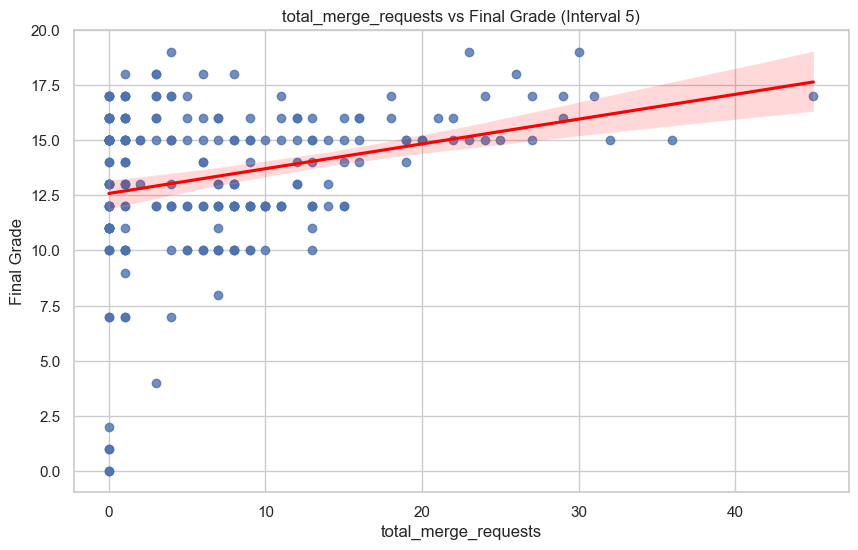

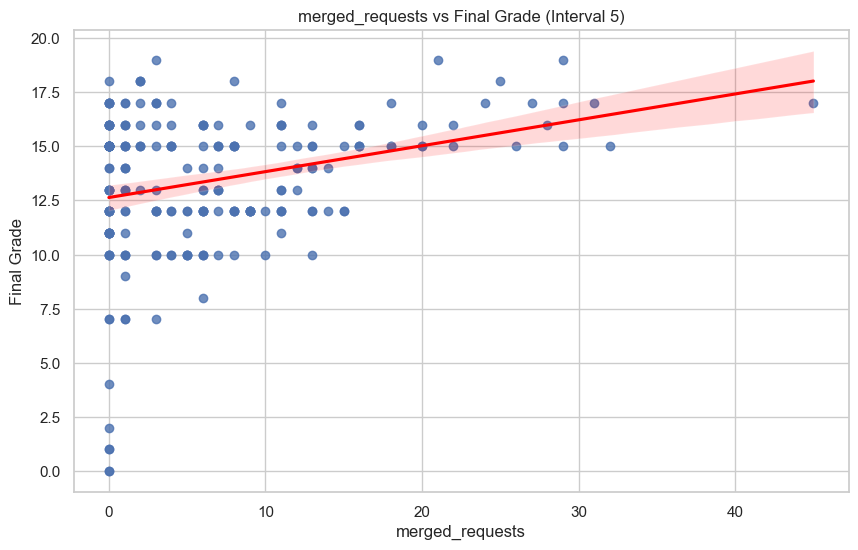

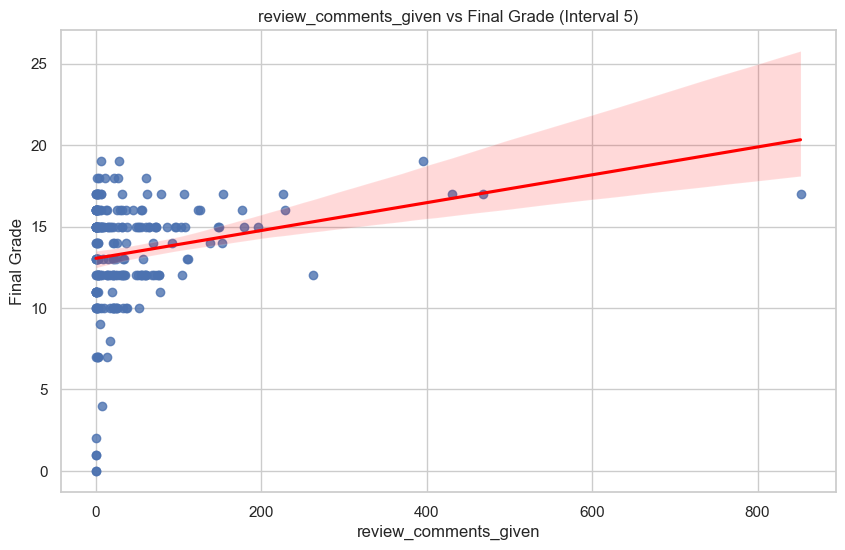

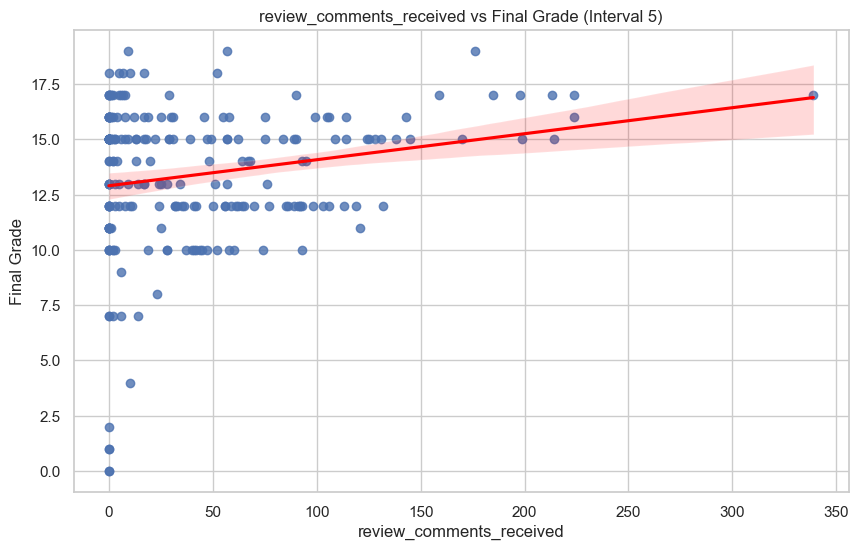

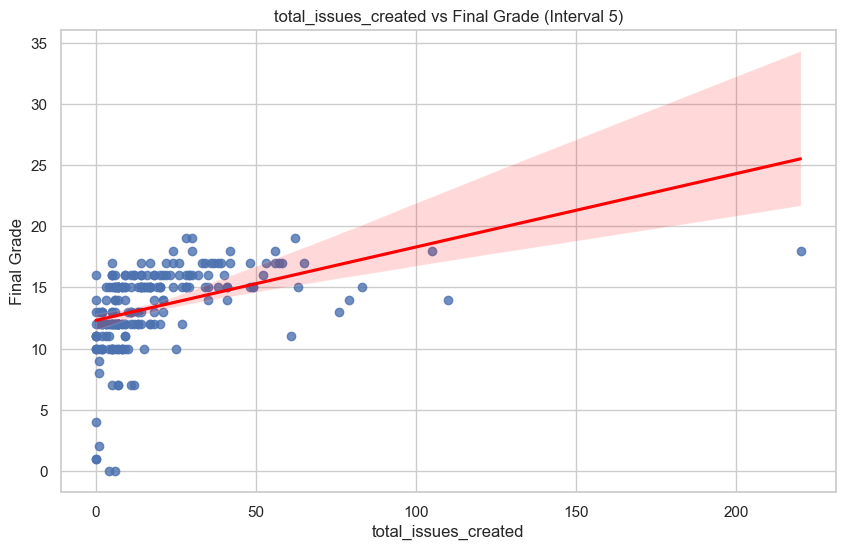

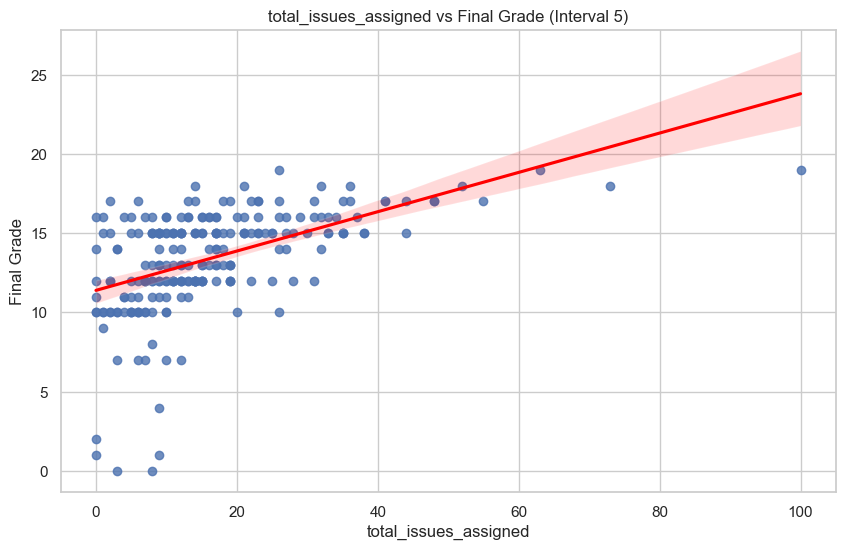

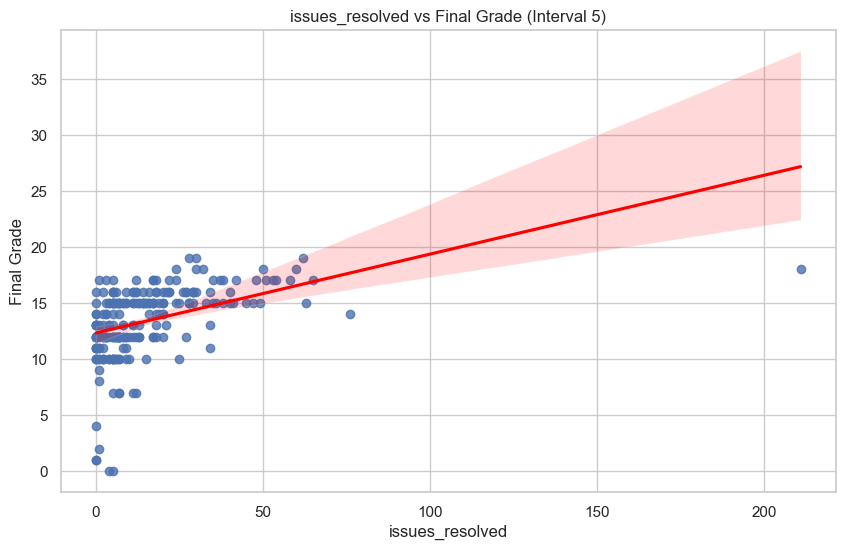

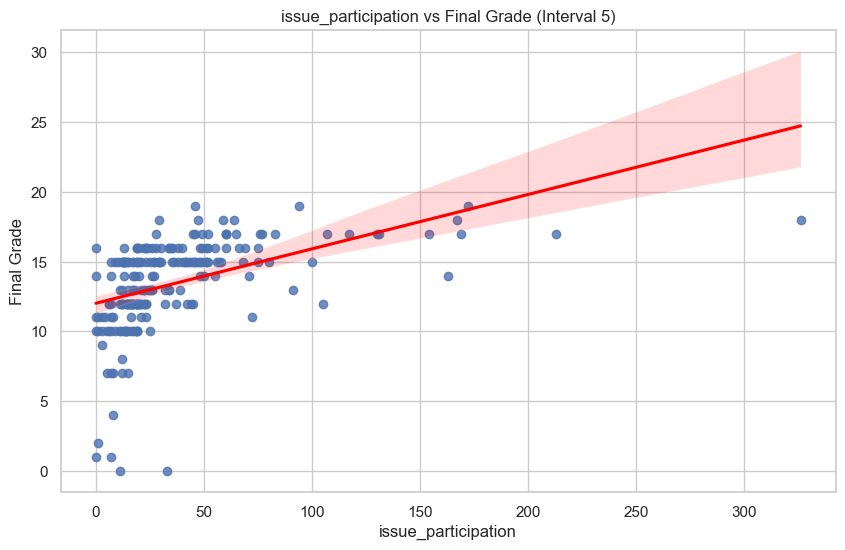

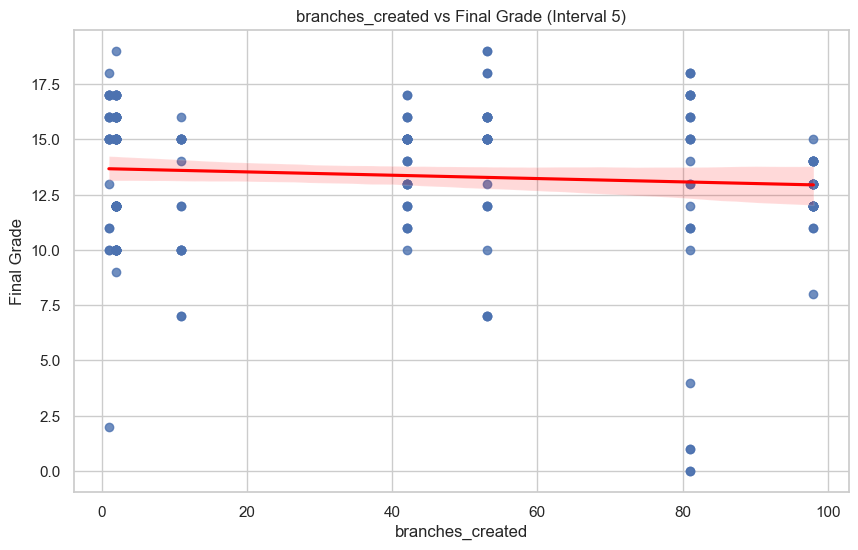

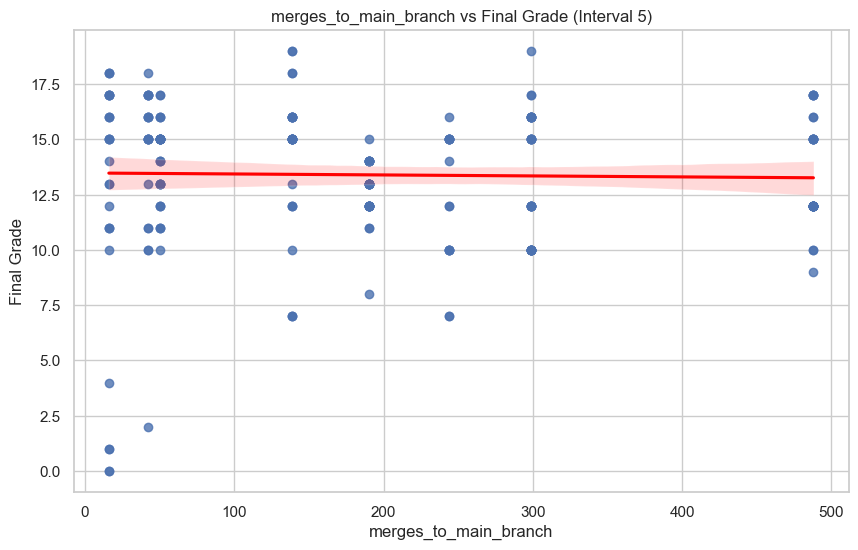

In [ ]:


for i in range(1, 6):
    df = pd.read_csv(f"student_features_interval_{i}.csv")
    # Correlação
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f"Matriz de Correlação - Intervalo {i}")
    plt.show()

    # Gráficos de dispersão entre as features e a nota final
    selected_features_temp = X.columns  # usa todas inicialmente

    for col in selected_features_temp:
        sns.regplot(data=df, x=col, y="Final Grade", line_kws={"color": "red"})
        plt.title(f"{col} vs Final Grade (Interval {i})")
        plt.xlabel(col)
        plt.ylabel("Final Grade")
        plt.show()


In [ ]:
#Grid Search


from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_selected, y)

print("🔍 Melhor combinação de hiperparâmetros:")
print(grid_search.best_params_)

print("\n✅ Melhor R² (cross-validation):")
print(grid_search.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/lucianarocha/Library/Python/3.9/lib/python/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>
    exitcode =

🔍 Melhor combinação de hiperparâmetros:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}

✅ Melhor R² (cross-validation):
-0.09450789595166909


In [ ]:
###SelectKBest + Random Forest


import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ⚙️ Configurações de visualização
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Recolher todos os ficheiros
all_files = sorted(glob.glob("student_features_interval_*.csv"))

results = []

# Loop pelos intervalos
for i, file_path in enumerate(all_files, start=1):
    print("="*80)
    print(f"📁 Interval {i}: {file_path}")
    
    # 1. Carregar dados
    df = pd.read_csv(file_path).dropna(subset=["Final Grade"])
    
    # 2. Preparar X e y
    X = df.drop(columns=["Final Grade", "project_id", "group_id", "mention_handle", "interval"], errors="ignore")
    y = df["Final Grade"]
    
    # 3. Normalização
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 4. Seleção de Features (Top 8)
    selector = SelectKBest(score_func=f_regression, k=min(8, X.shape[1]))
    X_selected = selector.fit_transform(X_scaled, y)
    selected_cols = X.columns[selector.get_support()]
    print(f"✅ Features Selecionadas: {selected_cols.tolist()}")

    # 5. Dividir treino/teste
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    
    # 6. Random Forest
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    # 7. Avaliação
    mse = mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    
    results.append({
        "Interval": i,
        "Model": "Random Forest",
        "MSE": mse,
        "MAE": mae,
        "R2": r2
    })

# Resultados finais
results_df = pd.DataFrame(results)
display(results_df)


📁 Interval 1: student_features_interval_1.csv
✅ Features Selecionadas: ['total_merge_requests', 'merged_requests', 'review_comments_given', 'review_comments_received', 'total_issues_created', 'total_issues_assigned', 'issues_resolved', 'issue_participation']
📁 Interval 2: student_features_interval_2.csv
✅ Features Selecionadas: ['total_merge_requests', 'merged_requests', 'review_comments_given', 'review_comments_received', 'total_issues_created', 'total_issues_assigned', 'issues_resolved', 'issue_participation']
📁 Interval 3: student_features_interval_3.csv
✅ Features Selecionadas: ['total_merge_requests', 'merged_requests', 'review_comments_given', 'review_comments_received', 'total_issues_created', 'total_issues_assigned', 'issues_resolved', 'issue_participation']
📁 Interval 4: student_features_interval_4.csv
✅ Features Selecionadas: ['total_merge_requests', 'merged_requests', 'review_comments_given', 'review_comments_received', 'total_issues_created', 'total_issues_assigned', 'issue

Interval          Model        MSE       MAE        R2
0         1  Random Forest  12.922013  2.458384 -0.135206
1         2  Random Forest  10.231576  2.212381 -0.023422
2         3  Random Forest   6.400654  1.819942  0.176222
3         4  Random Forest   9.239275  2.187242 -0.732364
4         5  Random Forest   7.325228  2.033388 -0.370182

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression

# Recolher os ficheiros
all_files = sorted(glob.glob("student_features_interval_*.csv"))

results_grid = []

# Param grid para Random Forest
param_grid = {
    "regressor__n_estimators": [50, 100, 200],
    "regressor__max_depth": [None, 5, 10],
    "regressor__min_samples_split": [2, 5],
}

# Loop pelos intervalos
for i, file_path in enumerate(all_files, start=1):
    print("="*80)
    print(f"📁 Interval {i}: {file_path}")
    
    # 1. Carregar dados
    df = pd.read_csv(file_path).dropna(subset=["Final Grade"])
    X = df.drop(columns=["Final Grade", "project_id", "group_id", "mention_handle", "interval"], errors="ignore")
    y = df["Final Grade"]

    # 2. Pipeline com SelectKBest + StandardScaler + Random Forest
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("selector", SelectKBest(score_func=f_regression, k=min(8, X.shape[1]))),
        ("regressor", RandomForestRegressor(random_state=42))
    ])

    # 3. Grid Search com Cross-Validation
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="r2", n_jobs=-1)
    grid_search.fit(X, y)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # 4. Avaliação em holdout (20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    best_model.fit(X_train, y_train)
    preds = best_model.predict(X_test)

    # 5. Exibir Features Selecionadas
    selector = best_model.named_steps['selector']
    selected_features = X.columns[selector.get_support()]
    print(f"🔑 Features selecionadas para o Intervalo {i}: {', '.join(selected_features)}")

    # 6. Armazenar resultados
    results_grid.append({
        "Interval": i,
        "Best Params": best_params,
        "MSE": mean_squared_error(y_test, preds),
        "MAE": mean_absolute_error(y_test, preds),
        "R2": r2_score(y_test, preds)
    })

# Mostrar resultados
results_grid_df = pd.DataFrame(results_grid)
display(results_grid_df)


📁 Interval 1: student_features_interval_1.csv
🔑 Features selecionadas para o Intervalo 1: total_merge_requests, merged_requests, review_comments_given, total_issues_created, total_issues_assigned, issues_resolved, issue_participation, merges_to_main_branch
📁 Interval 2: student_features_interval_2.csv
🔑 Features selecionadas para o Intervalo 2: total_merge_requests, merged_requests, review_comments_given, review_comments_received, total_issues_created, total_issues_assigned, issues_resolved, issue_participation
📁 Interval 3: student_features_interval_3.csv
🔑 Features selecionadas para o Intervalo 3: total_merge_requests, merged_requests, review_comments_given, review_comments_received, total_issues_created, total_issues_assigned, issues_resolved, issue_participation
📁 Interval 4: student_features_interval_4.csv
🔑 Features selecionadas para o Intervalo 4: total_merge_requests, merged_requests, review_comments_given, review_comments_received, total_issues_created, total_issues_assigned, 

Interval                                        Best Params        MSE  \
0         1  {'regressor__max_depth': 5, 'regressor__min_sa...  12.705732   
1         2  {'regressor__max_depth': 5, 'regressor__min_sa...   8.921725   
2         3  {'regressor__max_depth': 5, 'regressor__min_sa...   7.485651   
3         4  {'regressor__max_depth': 5, 'regressor__min_sa...   8.112930   
4         5  {'regressor__max_depth': 5, 'regressor__min_sa...   7.584836   

        MAE        R2  
0  2.451787 -0.116206  
1  1.993182  0.107597  
2  1.896915  0.036580  
3  2.084537 -0.521174  
4  2.070015 -0.418741

In [9]:
import joblib

# Modelo (ex: regressão, árvore, etc.)
model = nn_model


joblib.dump(nn_model, "NeuralNetwork_interval5.pkl")

NameError: name 'nn_model' is not defined